In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import _functions_sql as fs

In [2]:
# import from database
df_prod_emis = fs.get_dataframe("SELECT * from production_and_emissions_new")

In [3]:
df_prod_emis['prod_pop'] = df_prod_emis['production_in_t'] / df_prod_emis['population']
df_prod_emis['emis_pop'] = df_prod_emis['emissions_co2eq_combined_in_kt'] / df_prod_emis['population']
df_prod_emis = df_prod_emis[df_prod_emis['item_category'] != 'Live Animals']
df_prod_emis = df_prod_emis[~df_prod_emis['country'].isin(['China', 'China, Hong Kong SAR'])]

In [4]:
df_prod_emis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878675 entries, 0 to 995626
Data columns (total 29 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   country                                          878675 non-null  object 
 1   continent                                        878675 non-null  object 
 2   subcontinent                                     878675 non-null  object 
 3   special_area                                     878675 non-null  object 
 4   year                                             878675 non-null  int64  
 5   population                                       878675 non-null  int64  
 6   item                                             878675 non-null  object 
 7   item_code                                        878675 non-null  int64  
 8   item_group                                       878675 non-null  object 
 9   item_category       

## World food production

In [5]:
world_production = df_prod_emis[(df_prod_emis.country == 'World') & (df_prod_emis.year != 2021)]
continent_production = df_prod_emis[(df_prod_emis.country != 'World') & (df_prod_emis.year != 2021)]

In [6]:
item_categories = world_production.item_category.unique().tolist()
item_groups_crops_primary = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Crops, primary')].item_group.unique().tolist()
item_groups_livestock_primary = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Livestock primary')].item_group.unique().tolist()
item_groups_livestock_processed = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Livestock processed')].item_group.unique().tolist()
continents = continent_production.continent.unique().tolist()

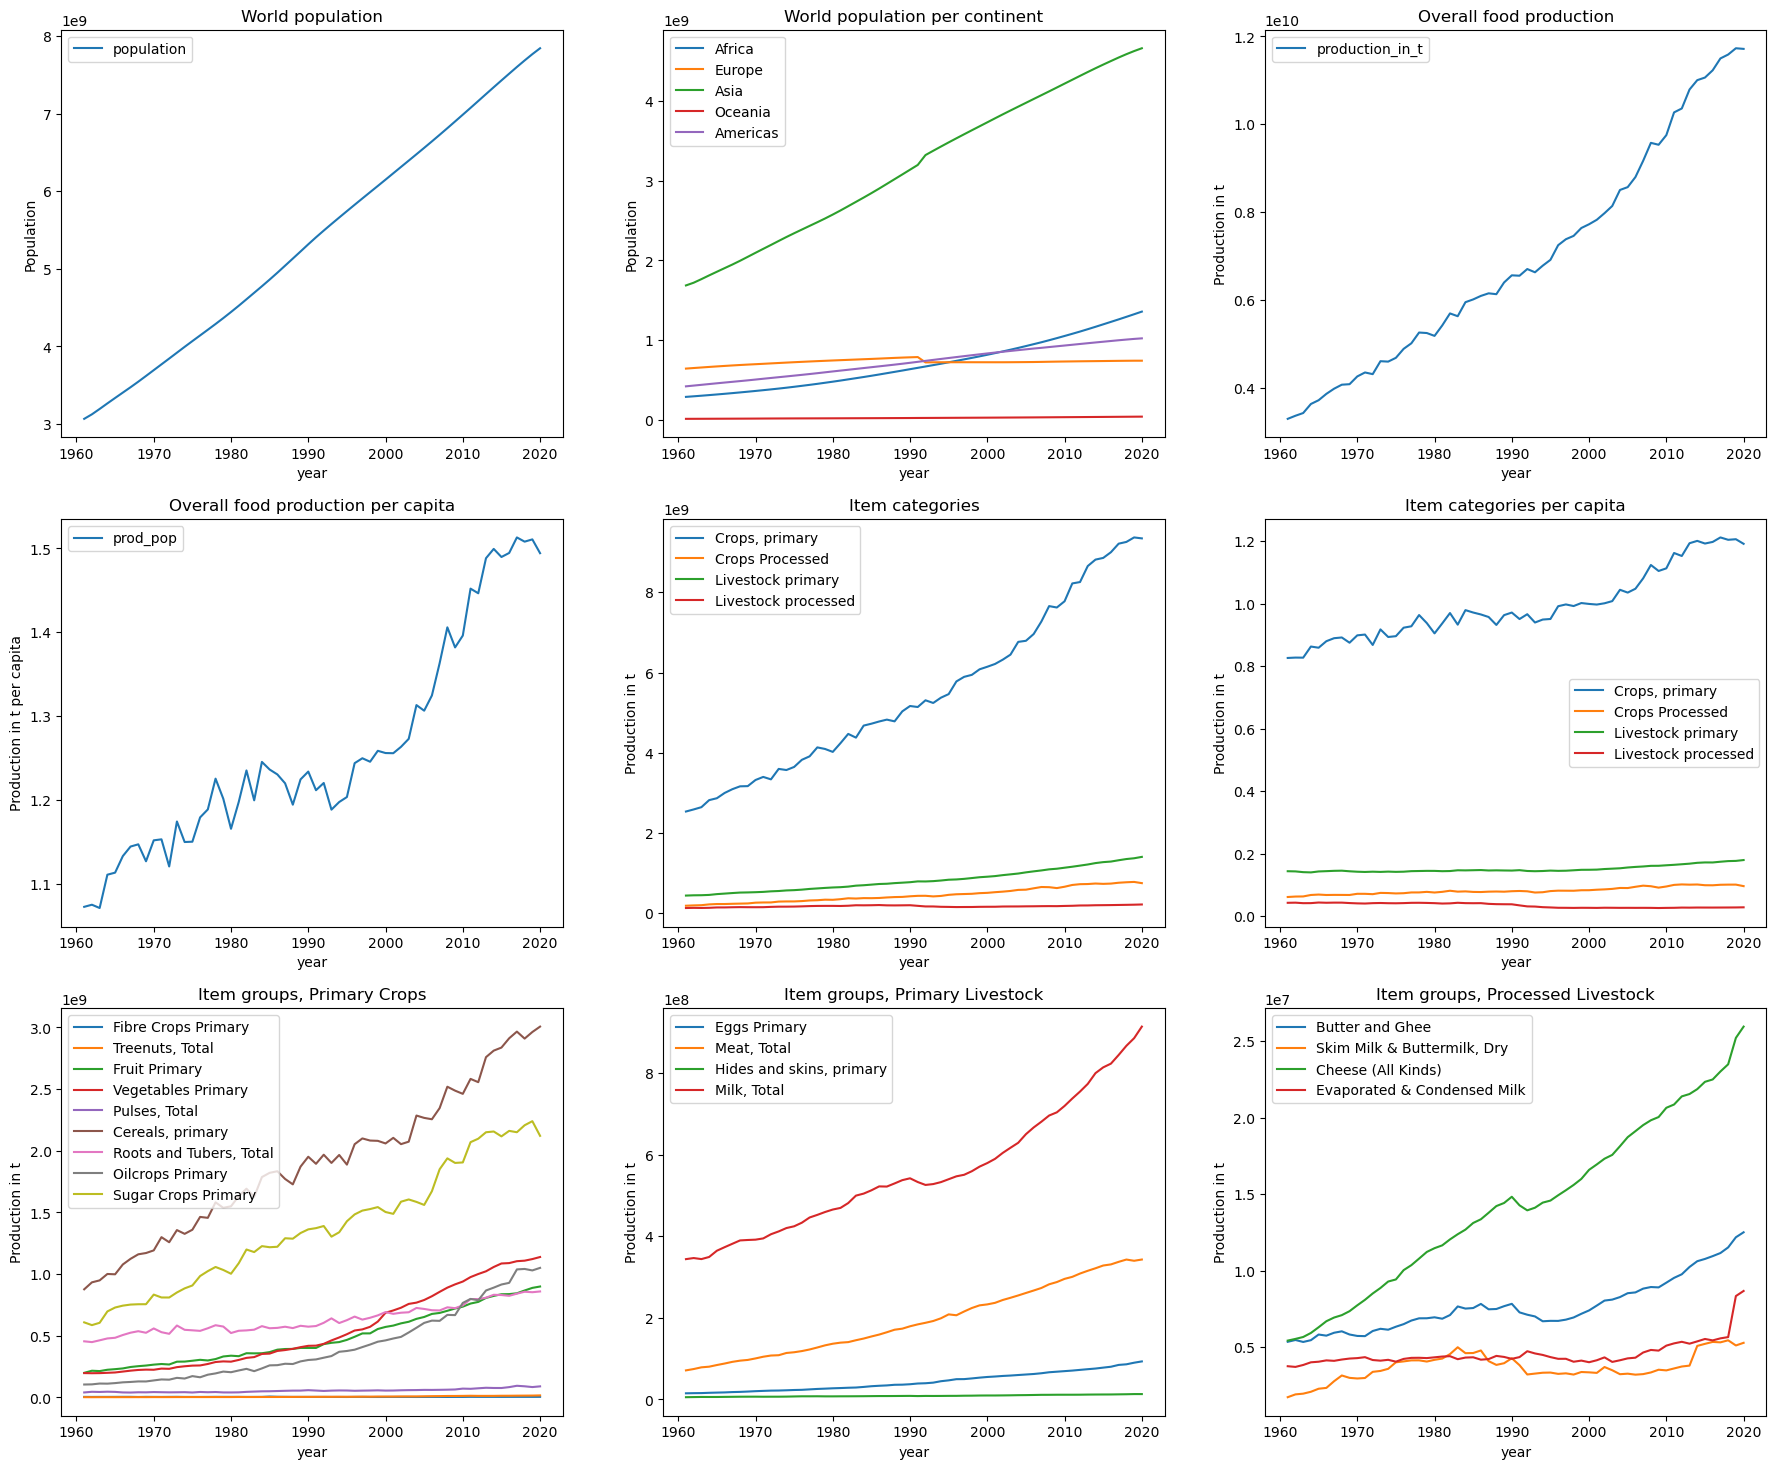

In [7]:
world_production_grouped_0 = world_production[['year', 'population']].groupby(['year'], as_index=False).max()
world_production_grouped_5 = continent_production[['year', 'country', 'continent', 'population']].groupby(['year', 'country', 'continent'], as_index=False).max()
world_production_grouped_5 = world_production_grouped_5[['year', 'continent', 'population']].groupby(['year', 'continent'], as_index=False).sum()
world_production_grouped_1 = world_production[['year', 'production_in_t']].groupby(['year'], as_index=False).sum()
world_production_grouped_2 = world_production[['year', 'prod_pop']].groupby(['year'], as_index=False).sum()
world_production_grouped_6 = world_production[['year', 'item_category', 'prod_pop']].groupby(['year', 'item_category'], as_index=False).sum()
world_production_grouped_3 = world_production[['year', 'item_category', 'production_in_t']].groupby(['year', 'item_category'], as_index=False).sum()
world_production_grouped_4 = world_production[['year', 'item_group', 'production_in_t']].groupby(['year', 'item_group'], as_index=False).sum()

fig, axes = plt.subplots(3, 3, figsize=(22, 18))

world_production_grouped_0.plot(x='year', y='population', ax=axes[0][0])
axes[0][0].legend()
axes[0][0].set_ylabel('Population')
axes[0][0].set_title('World population')

for continent in continents:
    world_production_grouped_5[world_production_grouped_5.continent == continent].plot(x='year', y='population', ax=axes[0][1], label=continent)
    axes[0][1].legend()
    axes[0][1].set_ylabel('Population')
    axes[0][1].set_title('World population per continent')

world_production_grouped_1.plot(x='year', y='production_in_t', ax=axes[0][2])
axes[0][2].legend()
axes[0][2].set_ylabel('Production in t')
axes[0][2].set_title('Overall food production')

world_production_grouped_2.plot(x='year', y='prod_pop', ax=axes[1][0])
axes[1][0].legend()
axes[1][0].set_ylabel('Production in t per capita')
axes[1][0].set_title('Overall food production per capita')

# Iterate over item categories
for item_category in item_categories:
    world_production_grouped_3[world_production_grouped_3.item_category == item_category].plot(x='year', y='production_in_t', ax=axes[1][1], label=item_category)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Production in t')
    axes[1][1].set_title('Item categories')

# Iterate over item categories
for item_category in item_categories:
    world_production_grouped_6[world_production_grouped_6.item_category == item_category].plot(x='year', y='prod_pop', ax=axes[1][2], label=item_category)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Production in t')
    axes[1][2].set_title('Item categories per capita')

# Iterate over item groups for primary crops
for item_group in item_groups_crops_primary:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[2][0], label=item_group)
    axes[2][0].legend()
    axes[2][0].set_ylabel('Production in t')
    axes[2][0].set_title('Item groups, Primary Crops')

# Iterate over item groups for primary livestock
for item_group in item_groups_livestock_primary:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[2][1], label=item_group)
    axes[2][1].legend()
    axes[2][1].set_ylabel('Production in t')
    axes[2][1].set_title('Item groups, Primary Livestock')

# Iterate over item groups for processed livestock
for item_group in item_groups_livestock_processed:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[2][2], label=item_group)
    axes[2][2].legend()
    axes[2][2].set_ylabel('Production in t')
    axes[2][2].set_title('Item groups, Processed Livestock')

In [9]:
world_production_2020 = world_production[df_prod_emis.year == 2020]

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_19347/2018193223.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_production_2020 = world_production[df_prod_emis.year == 2020]


Text(0, 0.5, 'Production in t')

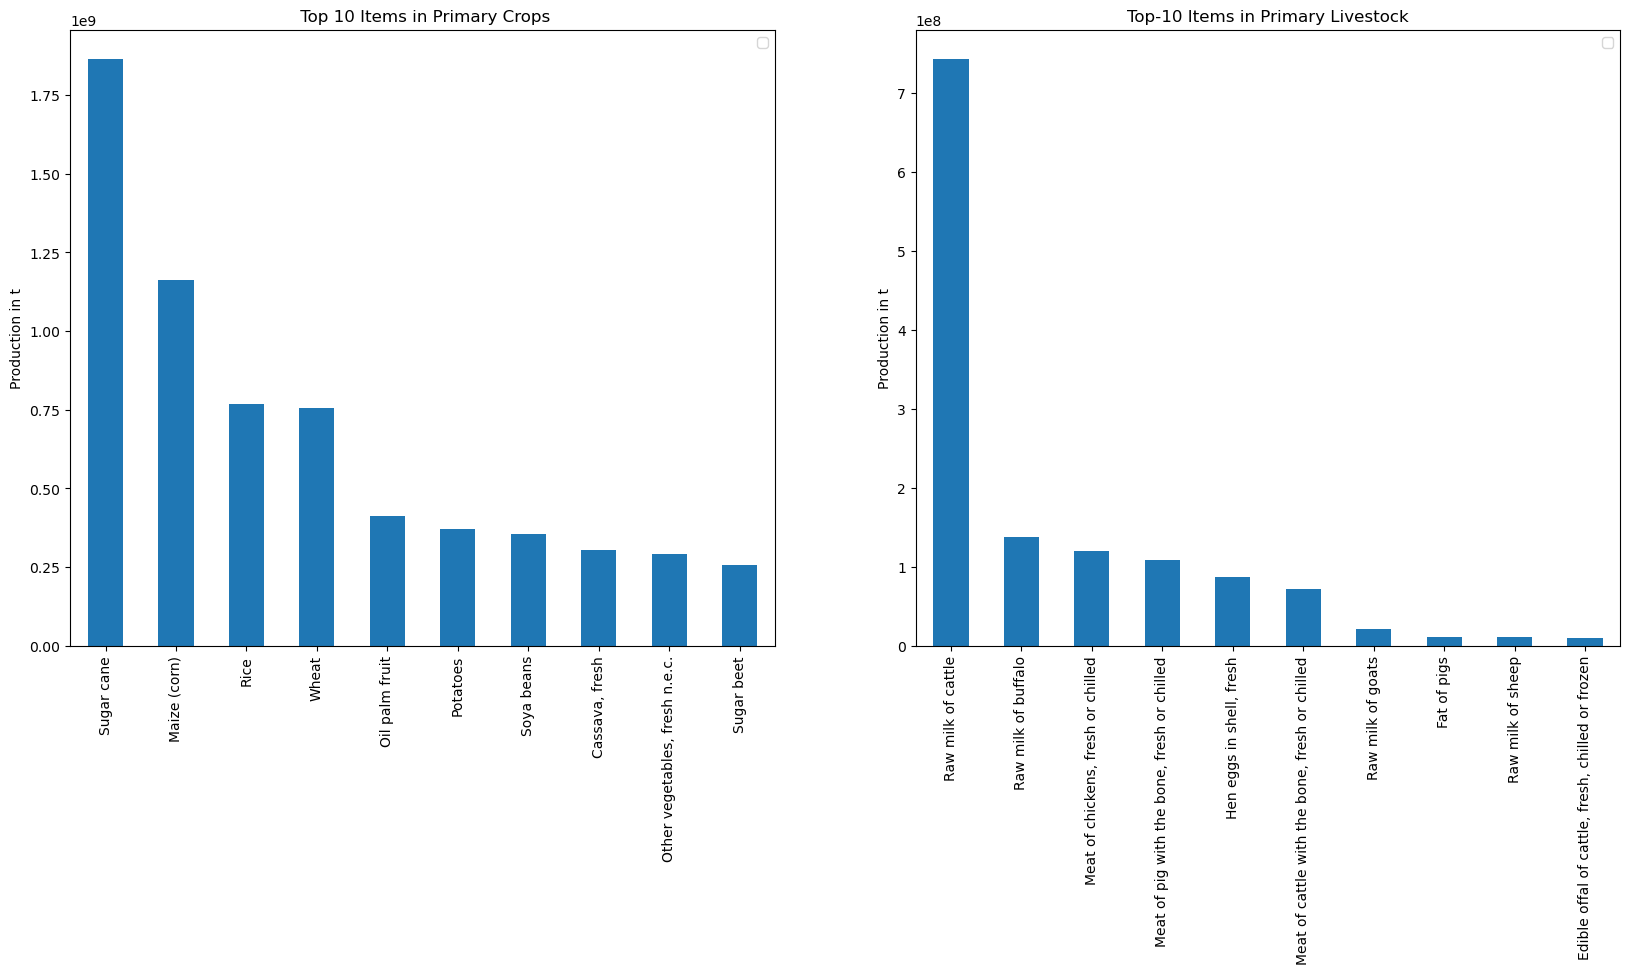

In [13]:
world_production_2020_grouped_1 = world_production_2020[world_production_2020.item_category == 'Crops, primary']
world_production_2020_grouped_1 = world_production_2020_grouped_1[['item', 'production_in_t']].groupby(['item'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)


world_production_2020_grouped_2 = world_production_2020[world_production_2020.item_category == 'Livestock primary']
world_production_2020_grouped_2 = world_production_2020_grouped_2[['item', 'production_in_t']].groupby(['item'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)

# Plot the top-10 agricultural emissions producers
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

world_production_2020_grouped_1.head(10).plot.bar(x='item', y='production_in_t', ax=axes[0])
axes[0].set_title(' Top 10 Items in Primary Crops')
axes[0].set_xlabel('')
axes[0].legend('')
axes[0].set_ylabel('Production in t')

world_production_2020_grouped_2.head(10).plot.bar(x='item', y='production_in_t', ax=axes[1])
axes[1].set_title('Top-10 Items in Primary Livestock')
axes[1].set_xlabel('')
axes[1].legend('')
axes[1].set_ylabel('Production in t')

## World emissions by food production

In [4]:
world_emissions = df_prod_emis[(df_prod_emis.country == 'World') & (df_prod_emis.year != 2021) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull())]

### Total emissions in kt

In [25]:
item_categories = world_emissions.item_category.unique().tolist()
item_groups = world_emissions.item_group.unique().tolist()
items = world_emissions.item.unique().tolist()
meat = list(filter(lambda x: 'Meat' in x, items))
milk_eggs = list(filter(lambda x: 'Raw milk' in x or 'Hen eggs' in x, items))
rice_wheat_maize = list(filter(lambda x: 'Rice' in x or 'Wheat' in x or 'Maize' in x, items))
remaining = list(set(items) - set(meat + milk_eggs + rice_wheat_maize))

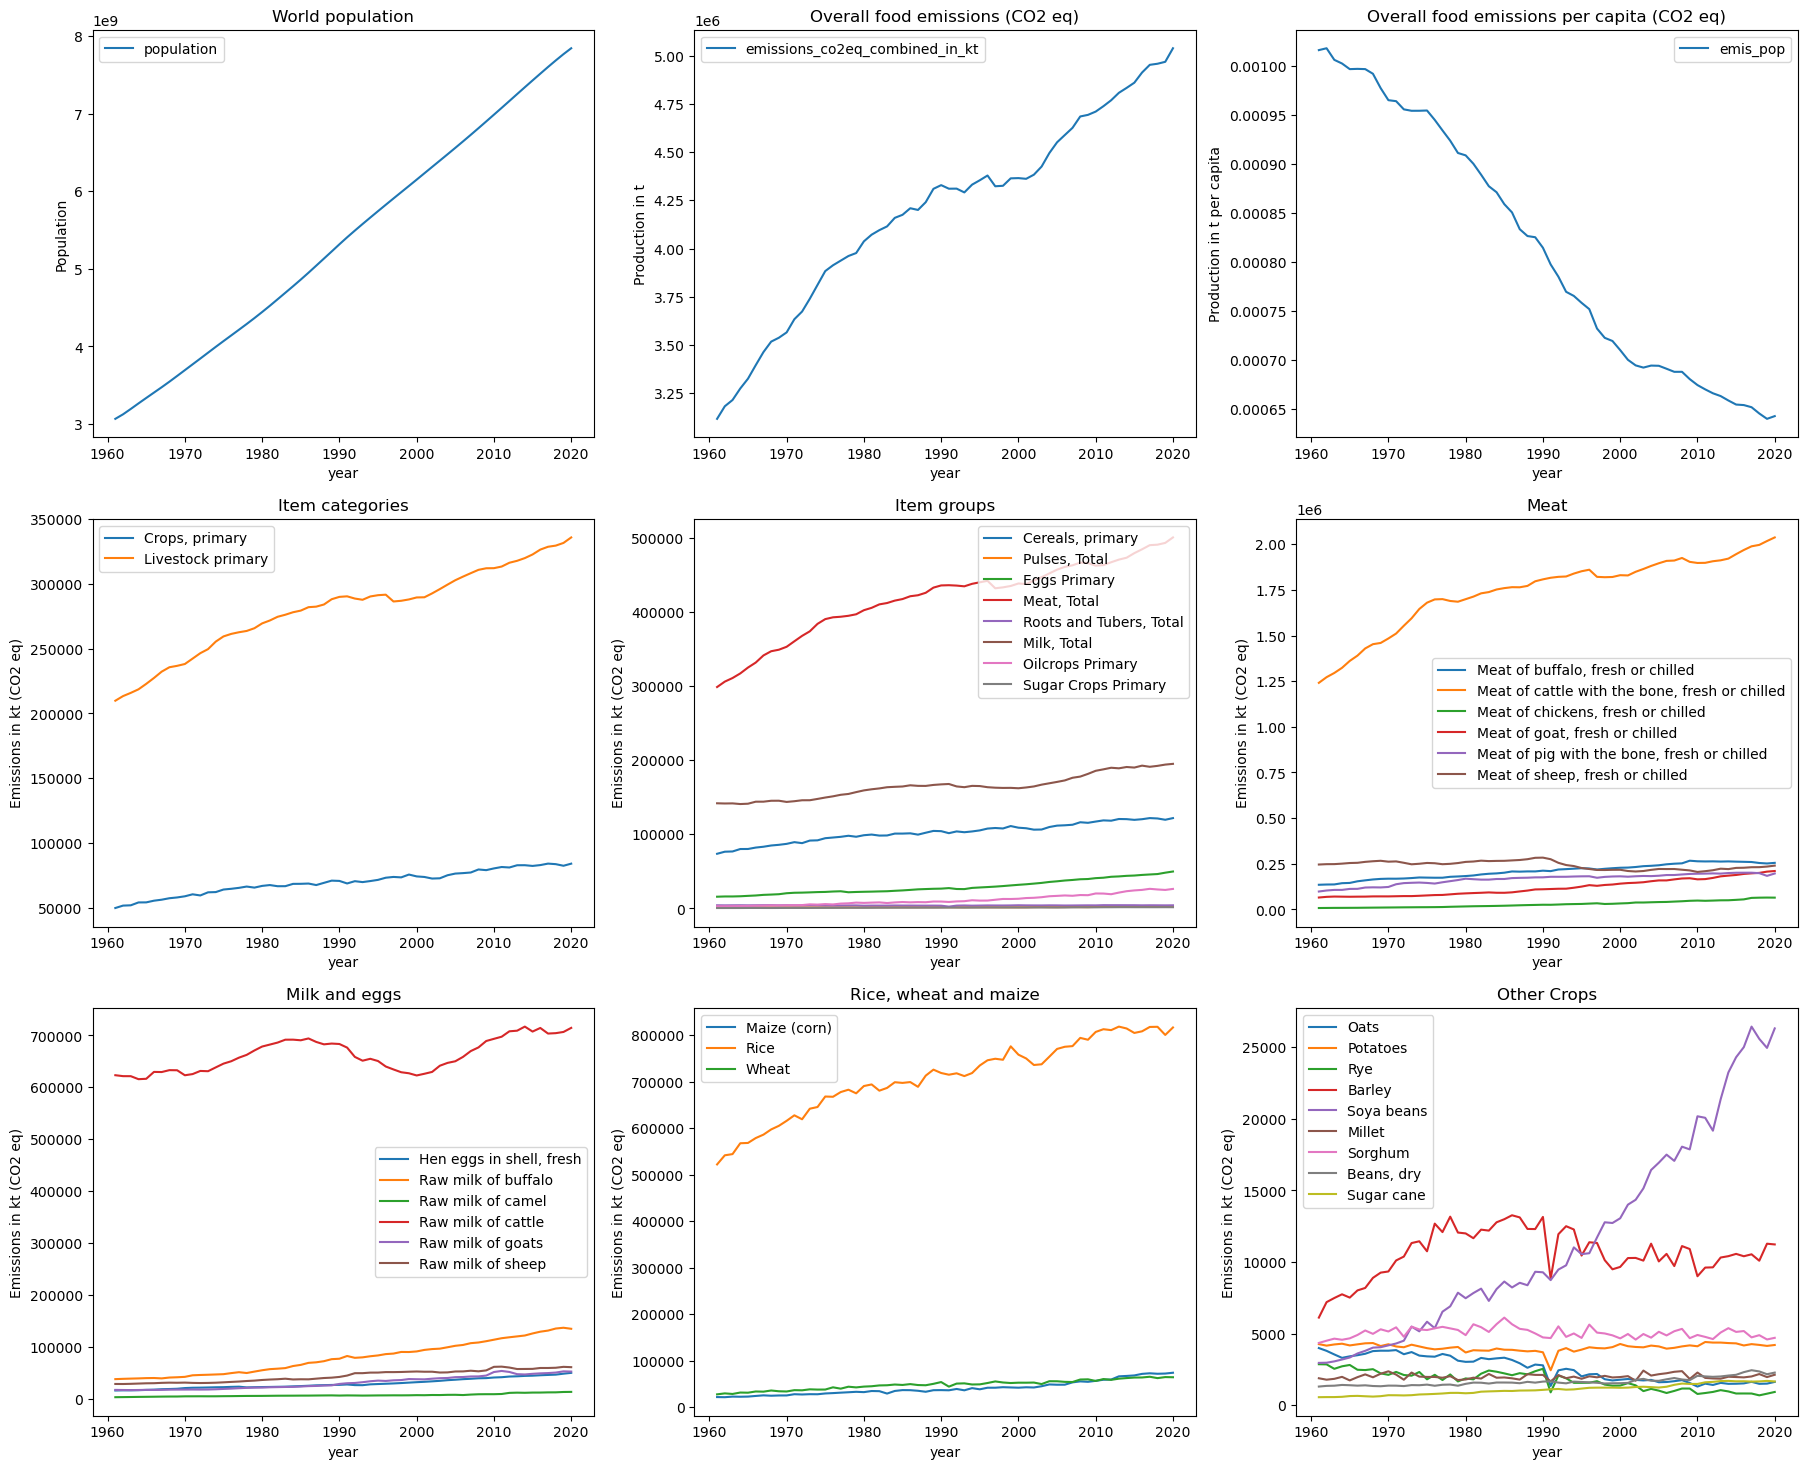

In [16]:
world_emissions_grouped_0 = world_emissions[['year', 'population']].groupby(['year'], as_index=False).max()
world_emissions_grouped_5 = world_emissions[['year', 'emissions_co2eq_combined_in_kt']].groupby(['year'], as_index=False).sum()
world_emissions_grouped_6 = world_emissions[['year', 'emis_pop']].groupby(['year'], as_index=False).sum()
world_emissions_grouped_1 = world_emissions[['item_category', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item_category', 'year'], as_index=False).agg('mean')
world_emissions_grouped_2 = world_emissions[['item_group', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item_group', 'year'], as_index=False).agg('mean')
world_emissions_grouped_3 = world_emissions[['item', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item', 'year'], as_index=False).agg('mean')

fig, axes = plt.subplots(3, 3, figsize=(22, 18))

world_emissions_grouped_0.plot(x='year', y='population', ax=axes[0][0])
axes[0][0].legend()
axes[0][0].set_ylabel('Population')
axes[0][0].set_title('World population')

world_emissions_grouped_5.plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[0][1])
axes[0][1].legend()
axes[0][1].set_ylabel('Production in t')
axes[0][1].set_title('Overall food emissions (CO2 eq)')

world_emissions_grouped_6.plot(x='year', y='emis_pop', ax=axes[0][2])
axes[0][2].legend()
axes[0][2].set_ylabel('Production in t per capita')
axes[0][2].set_title('Overall food emissions per capita (CO2 eq)')

# Iterate over item categories
for item_category in item_categories:
    world_emissions_grouped_1[world_emissions_grouped_1.item_category == item_category].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][0], label=item_category)
    axes[1][0].legend()
    axes[1][0].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][0].set_title('Item categories')

# Iterate over item groups
for item_group in item_groups:
    world_emissions_grouped_2[world_emissions_grouped_2.item_group == item_group].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][1], label=item_group)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][1].set_title('Item groups')

# Iterate over meat items
for item in meat:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][2], label=item)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][2].set_title('Meat')

# Iterate over milk and eggs items
for item in milk_eggs:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][0], label=item)
    axes[2][0].legend()
    axes[2][0].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][0].set_title('Milk and eggs')

# Iterate over rice, wheat and maize items
for item in rice_wheat_maize:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][1], label=item)
    axes[2][1].legend()
    axes[2][1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][1].set_title('Rice, wheat and maize')

    
# Iterate over remaining items
for item in remaining:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][2], label=item)
    axes[2][2].legend()
    axes[2][2].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][2].set_title('Other Crops')

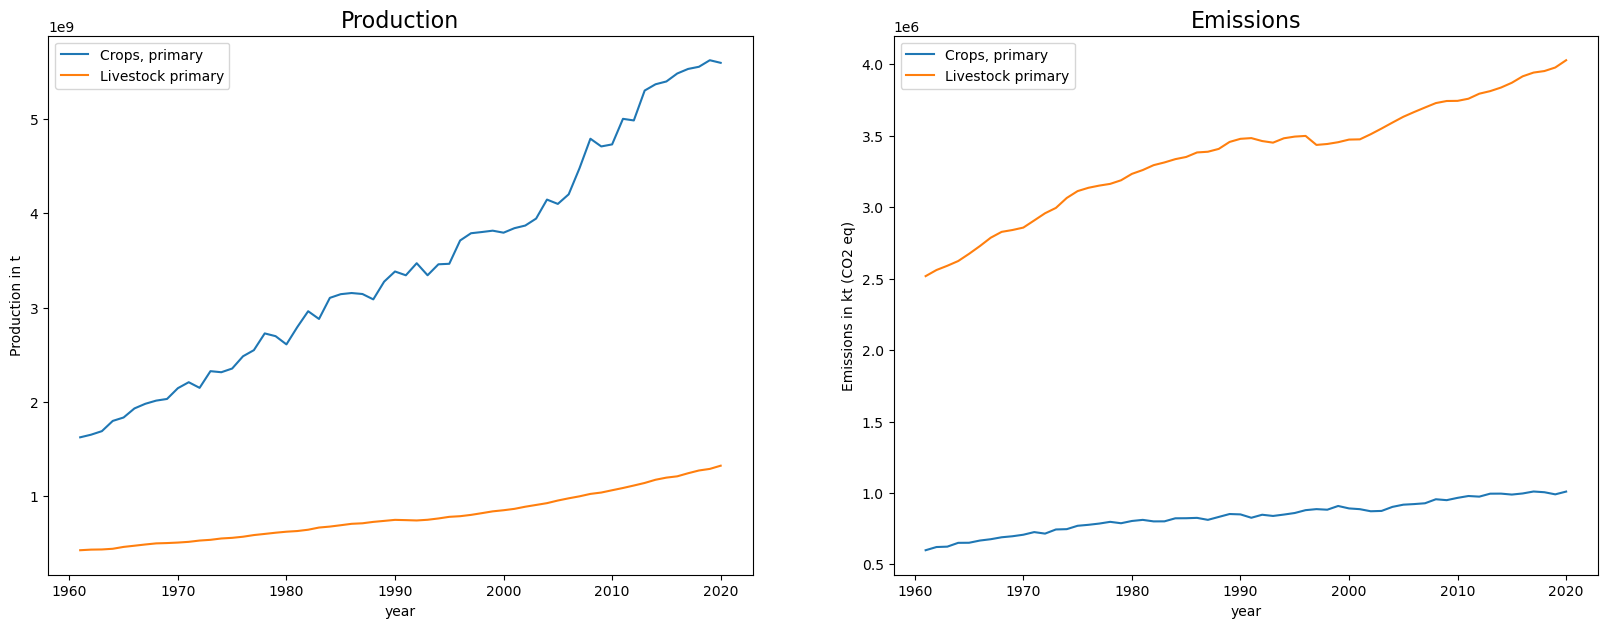

In [17]:
world_emissions_grouped_4 = world_emissions[['item_category', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['item_category', 'year'], as_index=False).agg('sum')

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Iterate over meat items
for item_category in item_categories:
    world_emissions_grouped_4[world_emissions_grouped_4.item_category == item_category].plot(x='year', y='production_in_t', ax=axes[0], label=item_category)
    axes[0].legend()
    axes[0].set_ylabel('Production in t')
    axes[0].set_title('Production', fontsize=16)

# Iterate over meat items
for item_category in item_categories:
    world_emissions_grouped_4[world_emissions_grouped_4.item_category == item_category].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1], label=item_category)
    axes[1].legend()
    axes[1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1].set_title('Emissions', fontsize=16)

Text(0.5, 1.0, 'Emissions')

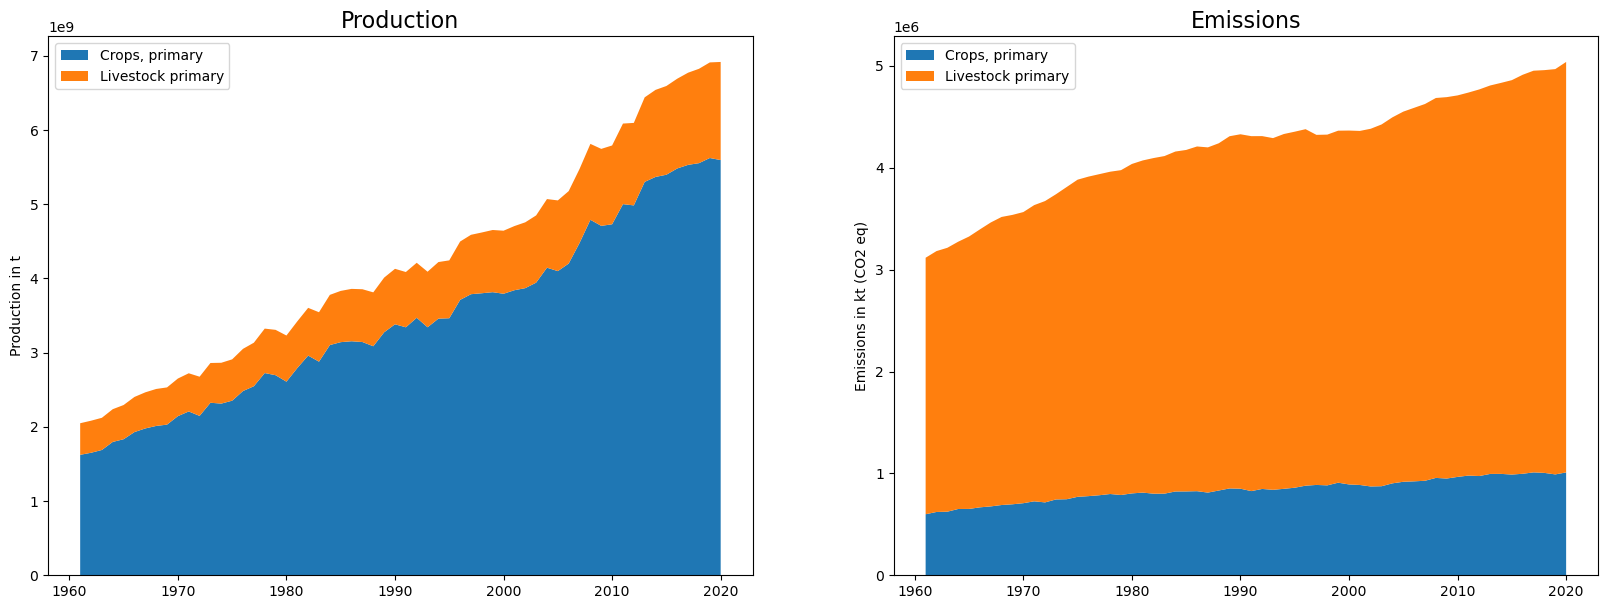

In [18]:
world_emissions_grouped_4 = world_emissions[['item_category', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['item_category', 'year'], as_index=False).agg('sum')

x = world_emissions_grouped_4.groupby(['year']).max()
x['year'] = x.index
x = x.year

y1 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Crops, primary'].production_in_t
y2 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Livestock primary'].production_in_t

z1 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Crops, primary'].emissions_co2eq_combined_in_kt
z2 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Livestock primary'].emissions_co2eq_combined_in_kt

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Iterate over meat items
axes[0].stackplot(x, y1, y2, labels=world_emissions_grouped_4.item_category.unique().tolist())
axes[0].legend(loc='upper left')
axes[0].set_ylabel('Production in t')
axes[0].set_title('Production', fontsize=16)

axes[1].stackplot(x, z1, z2, labels=world_emissions_grouped_4.item_category.unique().tolist())
axes[1].legend(loc='upper left')
axes[1].set_ylabel('Emissions in kt (CO2 eq)')
axes[1].set_title('Emissions', fontsize=16)

In [64]:
def meat_type(food_item):
    if food_item == 'Meat of cattle with the bone, fresh or chilled':
        return 'meat of cattle'
    elif food_item == 'Meat of pig with the bone, fresh or chilled':
        return 'meat of pigs'
    elif food_item == 'Meat of chickens, fresh or chilled':
        return 'meat of chickens'
    return 'meat of other animals'

world_emissions_meat = world_emissions[world_emissions.item_group == 'Meat, Total']
world_emissions_meat['meat_type'] = world_emissions_meat.item.apply(lambda x: meat_type(x))

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_22949/3389593957.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_emissions_meat['meat_type'] = world_emissions_meat.item.apply(lambda x: meat_type(x))


In [65]:
meat = world_emissions_meat.meat_type.unique().tolist()
meat

['meat of other animals', 'meat of cattle', 'meat of chickens', 'meat of pigs']

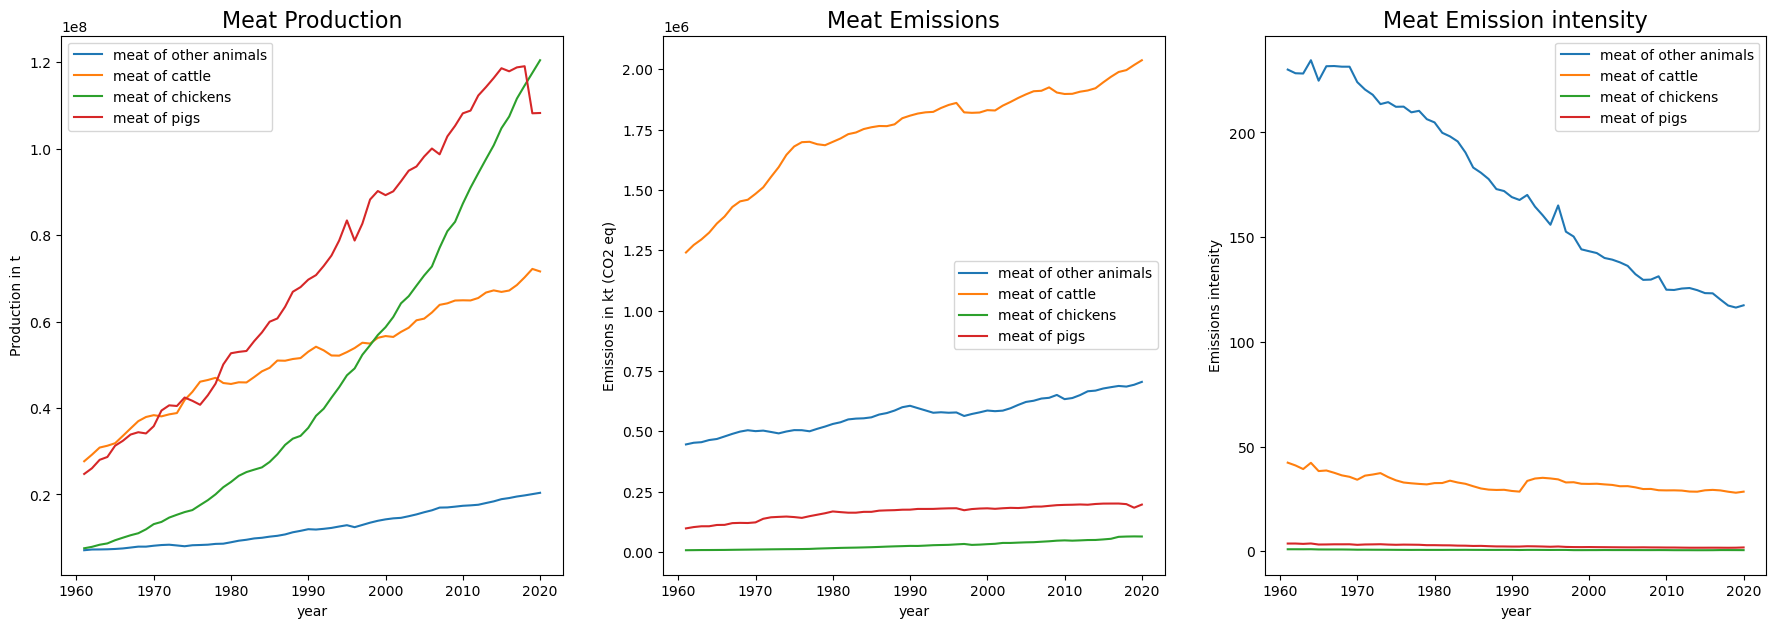

In [56]:
world_emissions_grouped_7 = world_emissions_meat[['meat_type', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['meat_type', 'year'], as_index=False).agg('sum')

fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# Iterate over meat items
for item in meat:
    world_emissions_grouped_7[world_emissions_grouped_7.meat_type == item].plot(x='year', y='production_in_t', ax=axes[0], label=item)
    axes[0].legend()
    axes[0].set_ylabel('Production in t')
    axes[0].set_title('Meat Production', fontsize=16)

# Iterate over meat items
for item in meat:
    world_emissions_grouped_7[world_emissions_grouped_7.meat_type == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1], label=item)
    axes[1].legend()
    axes[1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1].set_title('Meat Emissions', fontsize=16)

# Iterate over meat items
for item in meat:
    world_emissions_grouped_7[world_emissions_grouped_7.meat_type == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[2], label=item)
    axes[2].legend()
    axes[2].set_ylabel('Emissions intensity')
    axes[2].set_title('Meat Emission intensity', fontsize=16)

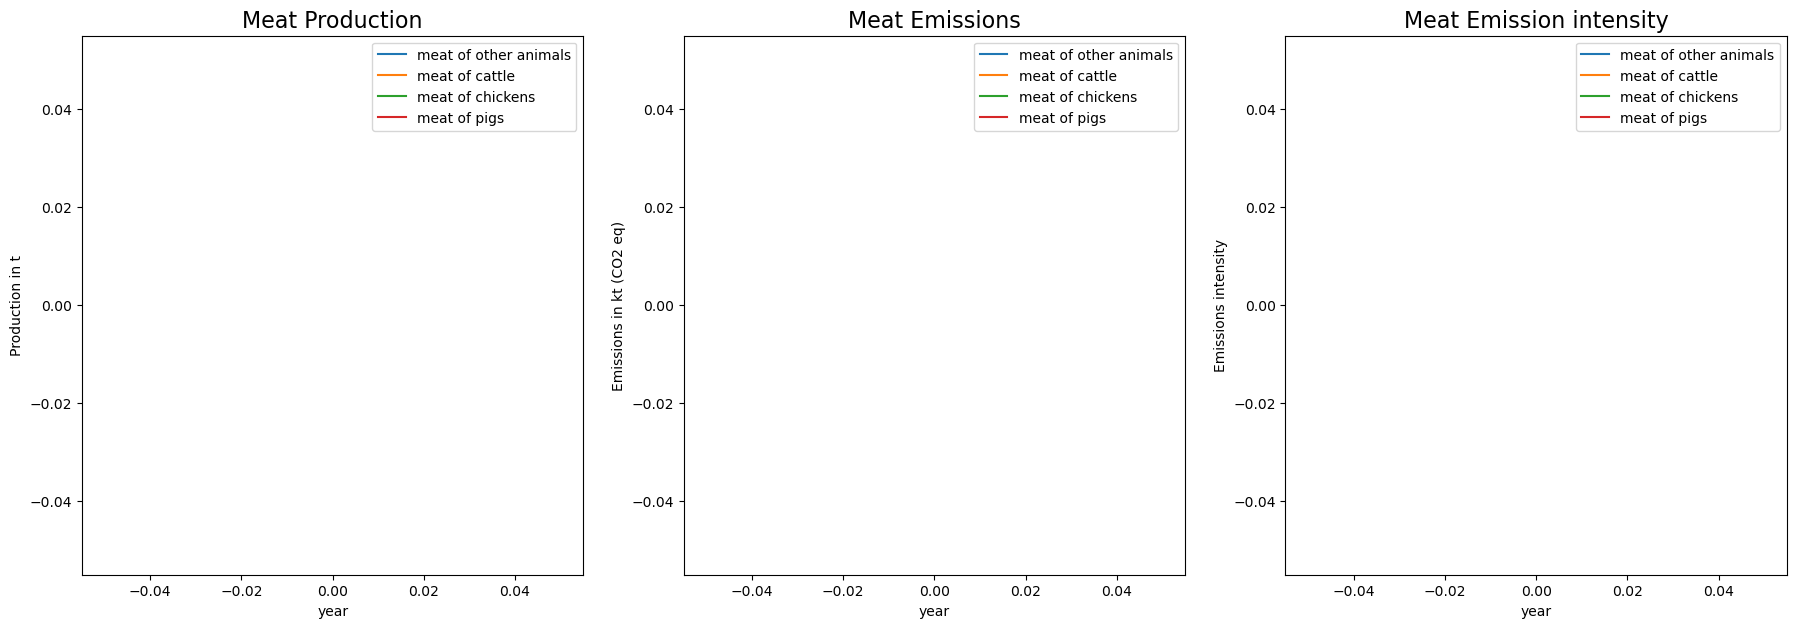

In [67]:
world_emissions_grouped_7 = world_emissions[['item', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item', 'year'], as_index=False).agg('sum')

fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# Iterate over meat items
for item in meat:
    world_emissions_grouped_7[world_emissions_grouped_7.item == item].plot(x='year', y='production_in_t', ax=axes[0], label=item)
    axes[0].legend()
    axes[0].set_ylabel('Production in t')
    axes[0].set_title('Meat Production', fontsize=16)

# Iterate over meat items
for item in meat:
    world_emissions_grouped_7[world_emissions_grouped_7.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1], label=item)
    axes[1].legend()
    axes[1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1].set_title('Meat Emissions', fontsize=16)

# Iterate over meat items
for item in meat:
    world_emissions_grouped_7[world_emissions_grouped_7.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[2], label=item)
    axes[2].legend()
    axes[2].set_ylabel('Emissions intensity')
    axes[2].set_title('Meat Emission intensity', fontsize=16)

Text(0.5, 1.0, 'Meat Emissions in 2020')

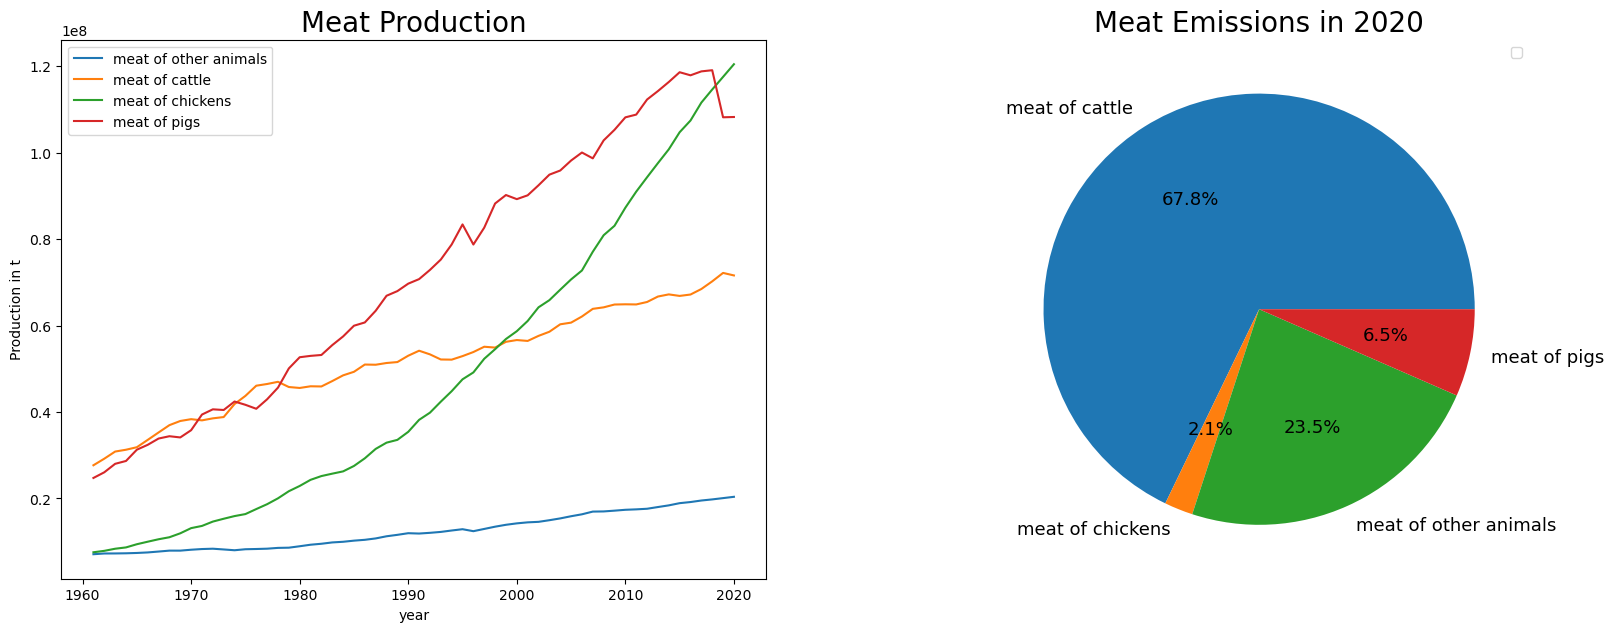

In [72]:
world_emissions_grouped_9 = world_emissions_meat[['meat_type', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['meat_type', 'year'], as_index=False).agg('sum')

world_emissions_grouped_9_2020 = world_emissions_grouped_9[(world_emissions_grouped_9.year == 2020)]

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Iterate over meat items
for meat_type in meat:
    world_emissions_grouped_9[world_emissions_grouped_9.meat_type == meat_type].plot(x='year', y='production_in_t', ax=axes[0], label=meat_type)
    axes[0].legend()
    axes[0].set_ylabel('Production in t')
    axes[0].set_title('Meat Production', fontsize=20)

world_emissions_grouped_9_2020[['meat_type', 'emissions_co2eq_combined_in_kt']].groupby('meat_type').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=13, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Meat Emissions in 2020', fontsize=20)

Text(0.5, 1.0, 'Meat Emissions')

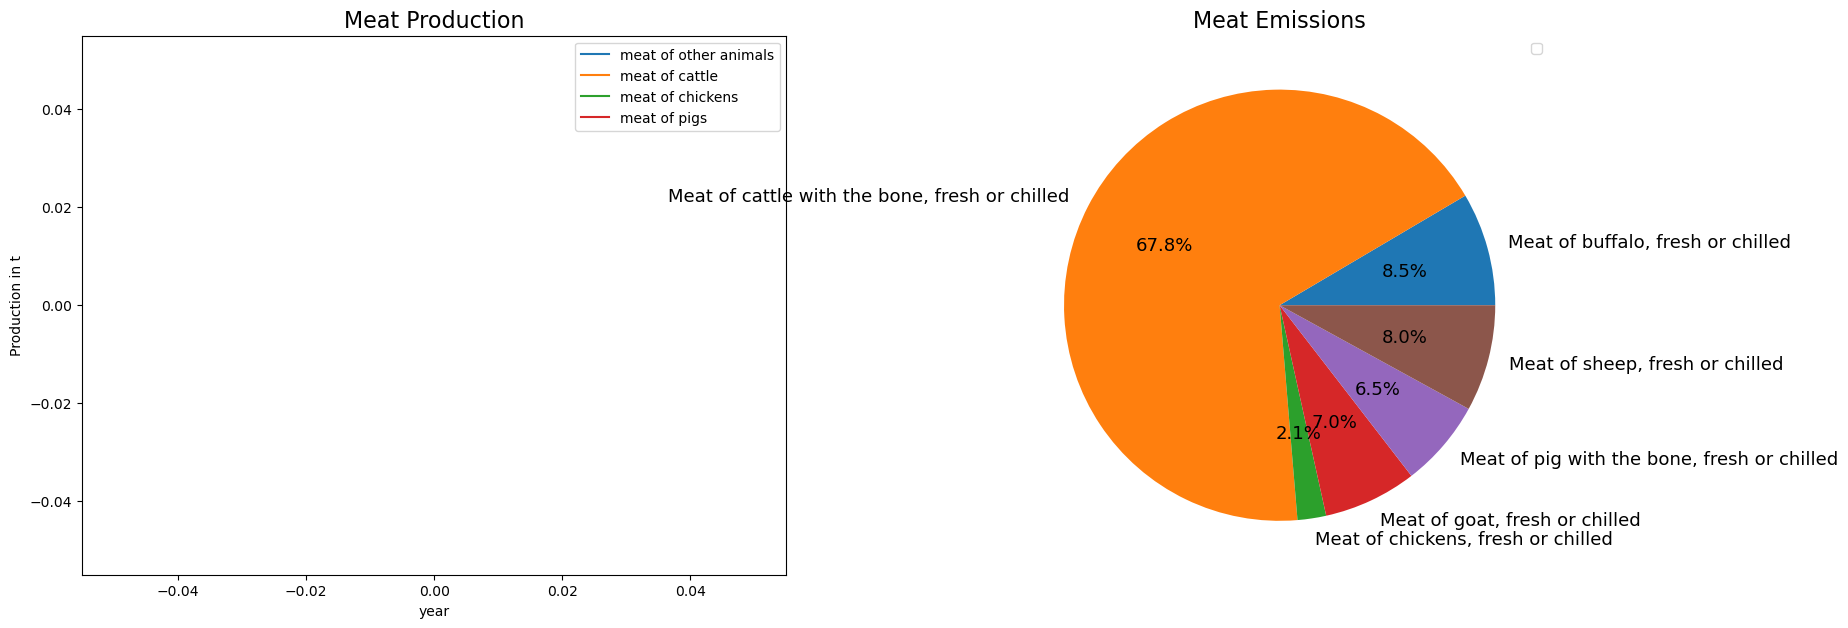

In [37]:
world_emissions_grouped_7 = world_emissions[['item', 'item_group', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['item', 'item_group', 'year'], as_index=False).agg('sum')

world_emissions_grouped_7_2020 = world_emissions_grouped_7[(world_emissions_grouped_7.year == 2020) & (world_emissions_grouped_7.item_group == 'Meat, Total')]

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Iterate over meat items
for item in meat:
    world_emissions_grouped_7[world_emissions_grouped_7.item == item].plot(x='year', y='production_in_t', ax=axes[0], label=item)
    axes[0].legend()
    axes[0].set_ylabel('Production in t')
    axes[0].set_title('Meat Production', fontsize=16)

world_emissions_grouped_7_2020[['item', 'emissions_co2eq_combined_in_kt']].groupby('item').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=13, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Meat Emissions', fontsize=16)

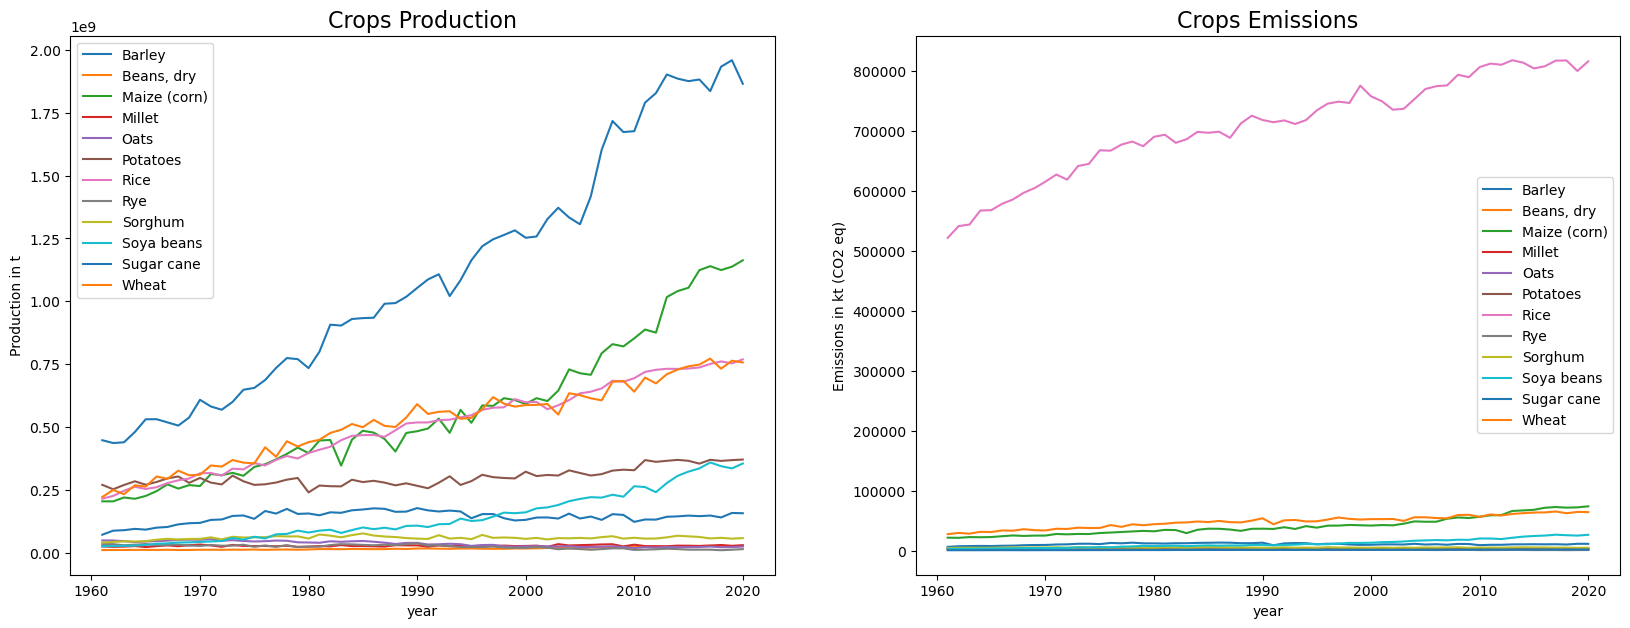

In [68]:
world_emissions_grouped_8 = world_emissions[world_emissions.item_category == 'Crops, primary']
world_emissions_grouped_8 = world_emissions_grouped_8[['item', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['item', 'year'], as_index=False).agg('sum')

items = world_emissions_grouped_8.item.unique().tolist()

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Iterate over meat items
for item in items:
    world_emissions_grouped_8[world_emissions_grouped_8.item == item].plot(x='year', y='production_in_t', ax=axes[0], label=item)
    axes[0].legend()
    axes[0].set_ylabel('Production in t')
    axes[0].set_title('Crops Production', fontsize=16)

# Iterate over meat items
for item in items:
    world_emissions_grouped_8[world_emissions_grouped_8.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1], label=item)
    axes[1].legend()
    axes[1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1].set_title('Crops Emissions', fontsize=16)

In [99]:
def crop_type(food_item):
    if food_item == 'Rice':
        return 'rice'
    elif food_item == 'Wheat':
        return 'wheat'
    elif food_item == 'Maize (corn)':
        return 'Maize'
    elif food_item == 'Sugar cane':
        return 'sugar cane'
    return 'other crops'

world_emissions_crops = world_emissions[world_emissions.item_category == 'Crops, primary']
world_emissions_crops['crop_type'] = world_emissions_crops.item.apply(lambda x: crop_type(x))

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_22949/3483705282.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_emissions_crops['crop_type'] = world_emissions_crops.item.apply(lambda x: crop_type(x))


In [100]:
crops = world_emissions_crops.crop_type.unique().tolist()
crops

['other crops', 'Maize', 'rice', 'sugar cane', 'wheat']

Text(0.5, 1.0, 'Crops Emissions in 2020')

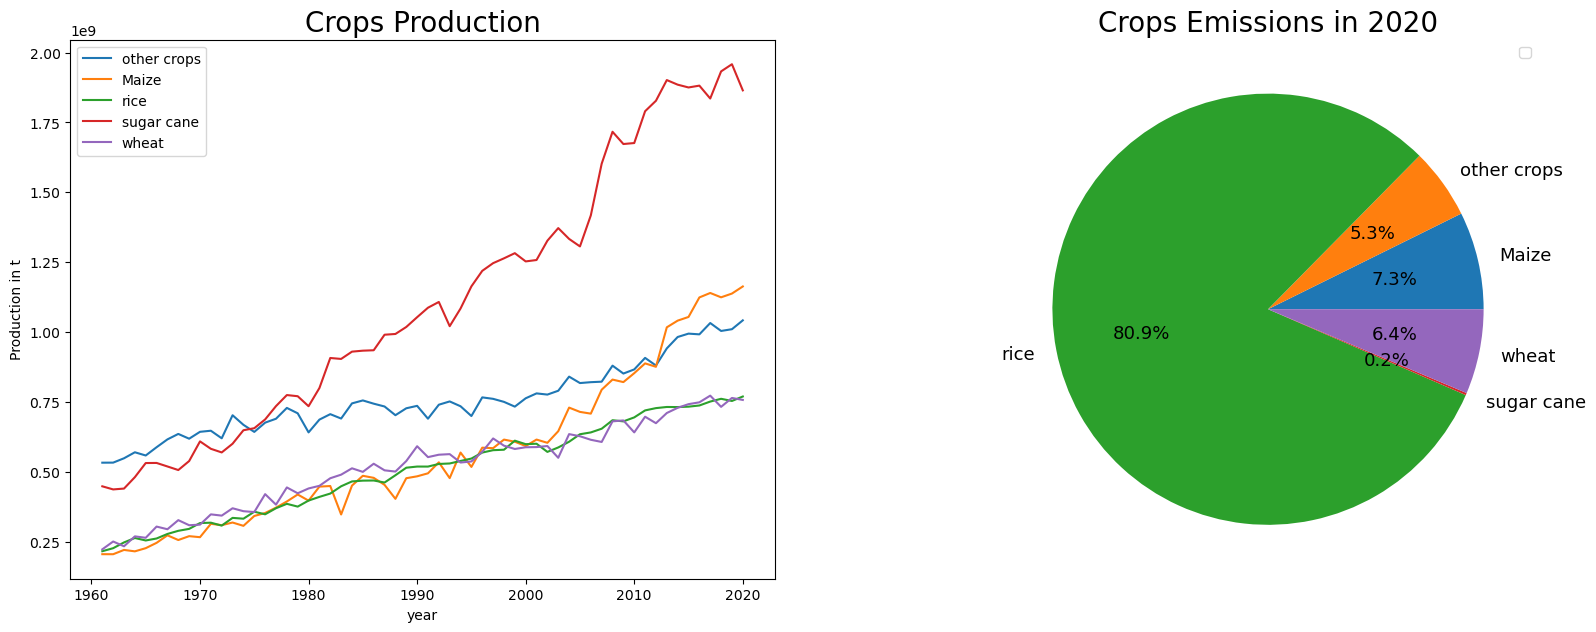

In [101]:
world_emissions_grouped_8 = world_emissions_crops[['crop_type', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['crop_type', 'year'], as_index=False).agg('sum')

world_emissions_grouped_8_2020 = world_emissions_grouped_8[(world_emissions_grouped_8.year == 2020)]

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Iterate over meat items
for crop_type in crops:
    world_emissions_grouped_8[world_emissions_grouped_8.crop_type == crop_type].plot(x='year', y='production_in_t', ax=axes[0], label=crop_type)
    axes[0].legend()
    axes[0].set_ylabel('Production in t')
    axes[0].set_title('Crops Production', fontsize=20)

world_emissions_grouped_8_2020[['crop_type', 'emissions_co2eq_combined_in_kt']].groupby('crop_type').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=13, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Crops Emissions in 2020', fontsize=20)

Text(0.5, 1.0, 'Crops Emissions')

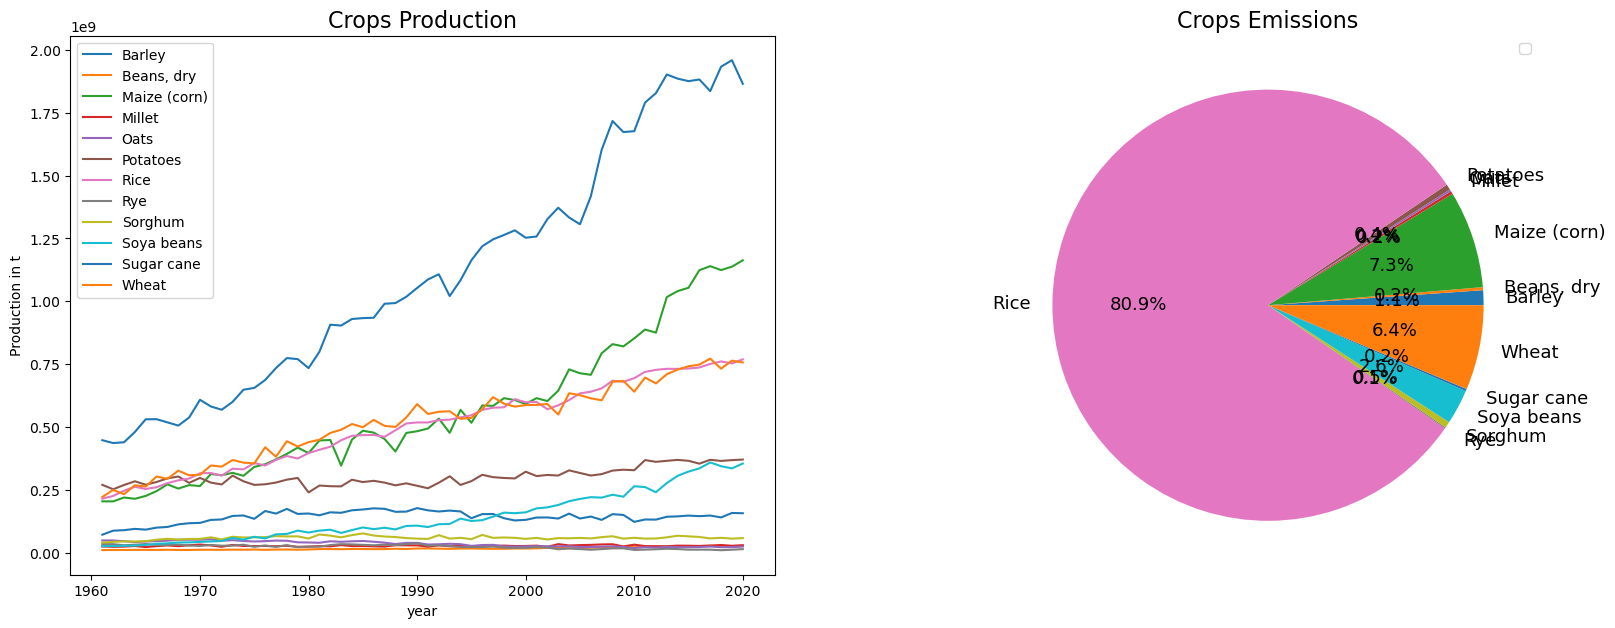

In [82]:
world_emissions_grouped_8 = world_emissions[(world_emissions.item_category == 'Crops, primary')]
world_emissions_grouped_8 = world_emissions_grouped_8[['item', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['item', 'year'], as_index=False).agg('sum')

world_emissions_grouped_8_2020 = world_emissions_grouped_8[(world_emissions_grouped_8.year == 2020)]


items = world_emissions_grouped_8.item.unique().tolist()

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Iterate over meat items
for item in items:
    world_emissions_grouped_8[world_emissions_grouped_8.item == item].plot(x='year', y='production_in_t', ax=axes[0], label=item)
    axes[0].legend()
    axes[0].set_ylabel('Production in t')
    axes[0].set_title('Crops Production', fontsize=16)

world_emissions_grouped_8_2020[['item', 'emissions_co2eq_combined_in_kt']].groupby('item').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=13, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Crops Emissions', fontsize=16)

### Emission intensity

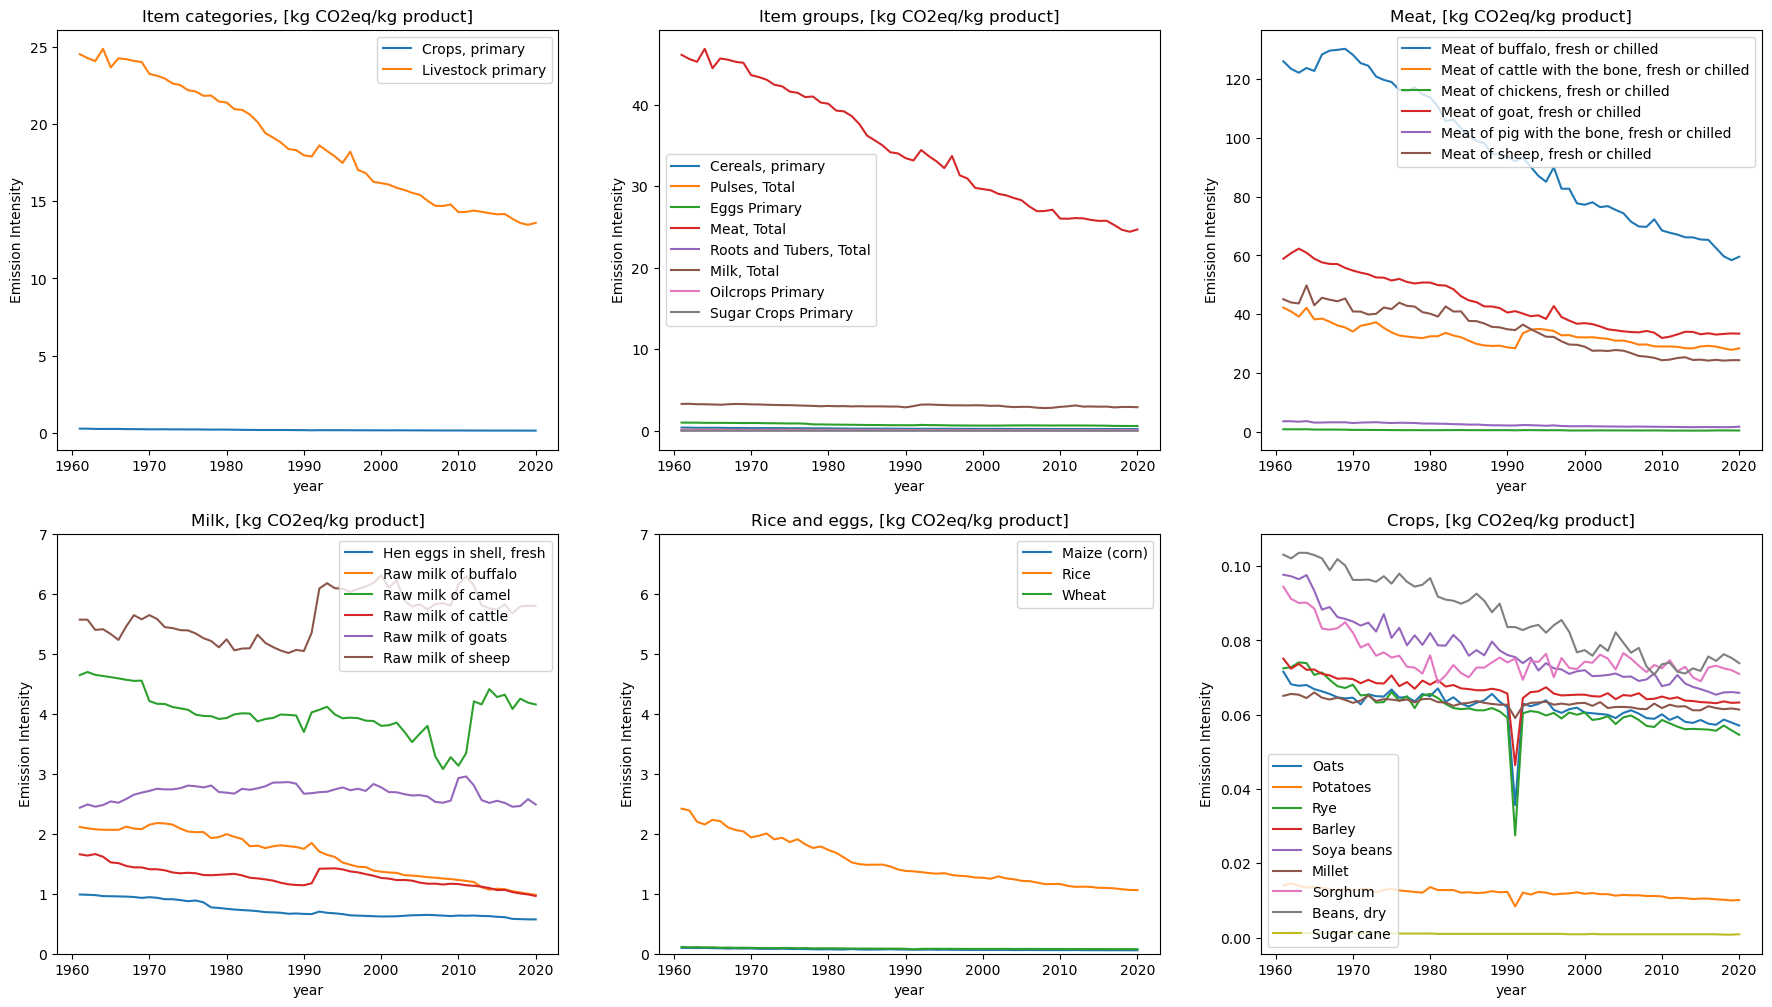

In [37]:
world_emissions_grouped_1 = world_emissions[['item_category', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item_category', 'year'], as_index=False).agg('mean')
world_emissions_grouped_2 = world_emissions[['item_group', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item_group', 'year'], as_index=False).agg('mean')
world_emissions_grouped_3 = world_emissions[['item', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item', 'year'], as_index=False).agg('mean')

fig, axes = plt.subplots(2, 3, figsize=(22, 12))

# Iterate over item categories
for item_category in item_categories:
    world_emissions_grouped_1[world_emissions_grouped_1.item_category == item_category].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][0], label=item_category)
    axes[0][0].legend()
    axes[0][0].set_ylabel('Emission Intensity')
    axes[0][0].set_title('Item categories, [kg CO2eq/kg product]')

# Iterate over item groups
for item_group in item_groups:
    world_emissions_grouped_2[world_emissions_grouped_2.item_group == item_group].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][1], label=item_group)
    axes[0][1].legend()
    axes[0][1].set_ylabel('Emission Intensity')
    axes[0][1].set_title('Item groups, [kg CO2eq/kg product]')

# Iterate over meat items
for item in meat:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][2], label=item)
    axes[0][2].legend()
    axes[0][2].set_ylabel('Emission Intensity')
    axes[0][2].set_title('Meat, [kg CO2eq/kg product]')

# Iterate over milk and egg items
for item in milk_eggs:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][0], label=item)
    axes[1][0].legend()
    axes[1][0].set_ylabel('Emission Intensity')
    axes[1][0].set_title('Milk, [kg CO2eq/kg product]')
    axes[1][0].set_ylim([0,7])

# Iterate over rice, wheat and maize items
for item in rice_wheat_maize:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][1], label=item)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Emission Intensity')
    axes[1][1].set_title('Rice and eggs, [kg CO2eq/kg product]')
    axes[1][1].set_ylim([0,7])
    
# Iterate over remaining items
for item in remaining:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][2], label=item)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Emission Intensity')
    axes[1][2].set_title('Crops, [kg CO2eq/kg product]')

## Analysis for 2020

### Country comparison - production and emissions

In [74]:
prod_emis_countries = df_prod_emis[(df_prod_emis.year == 2020) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull()) & (df_prod_emis.country != 'World')]

Text(0, 0.5, 'Emissions in kt (co2eq)')

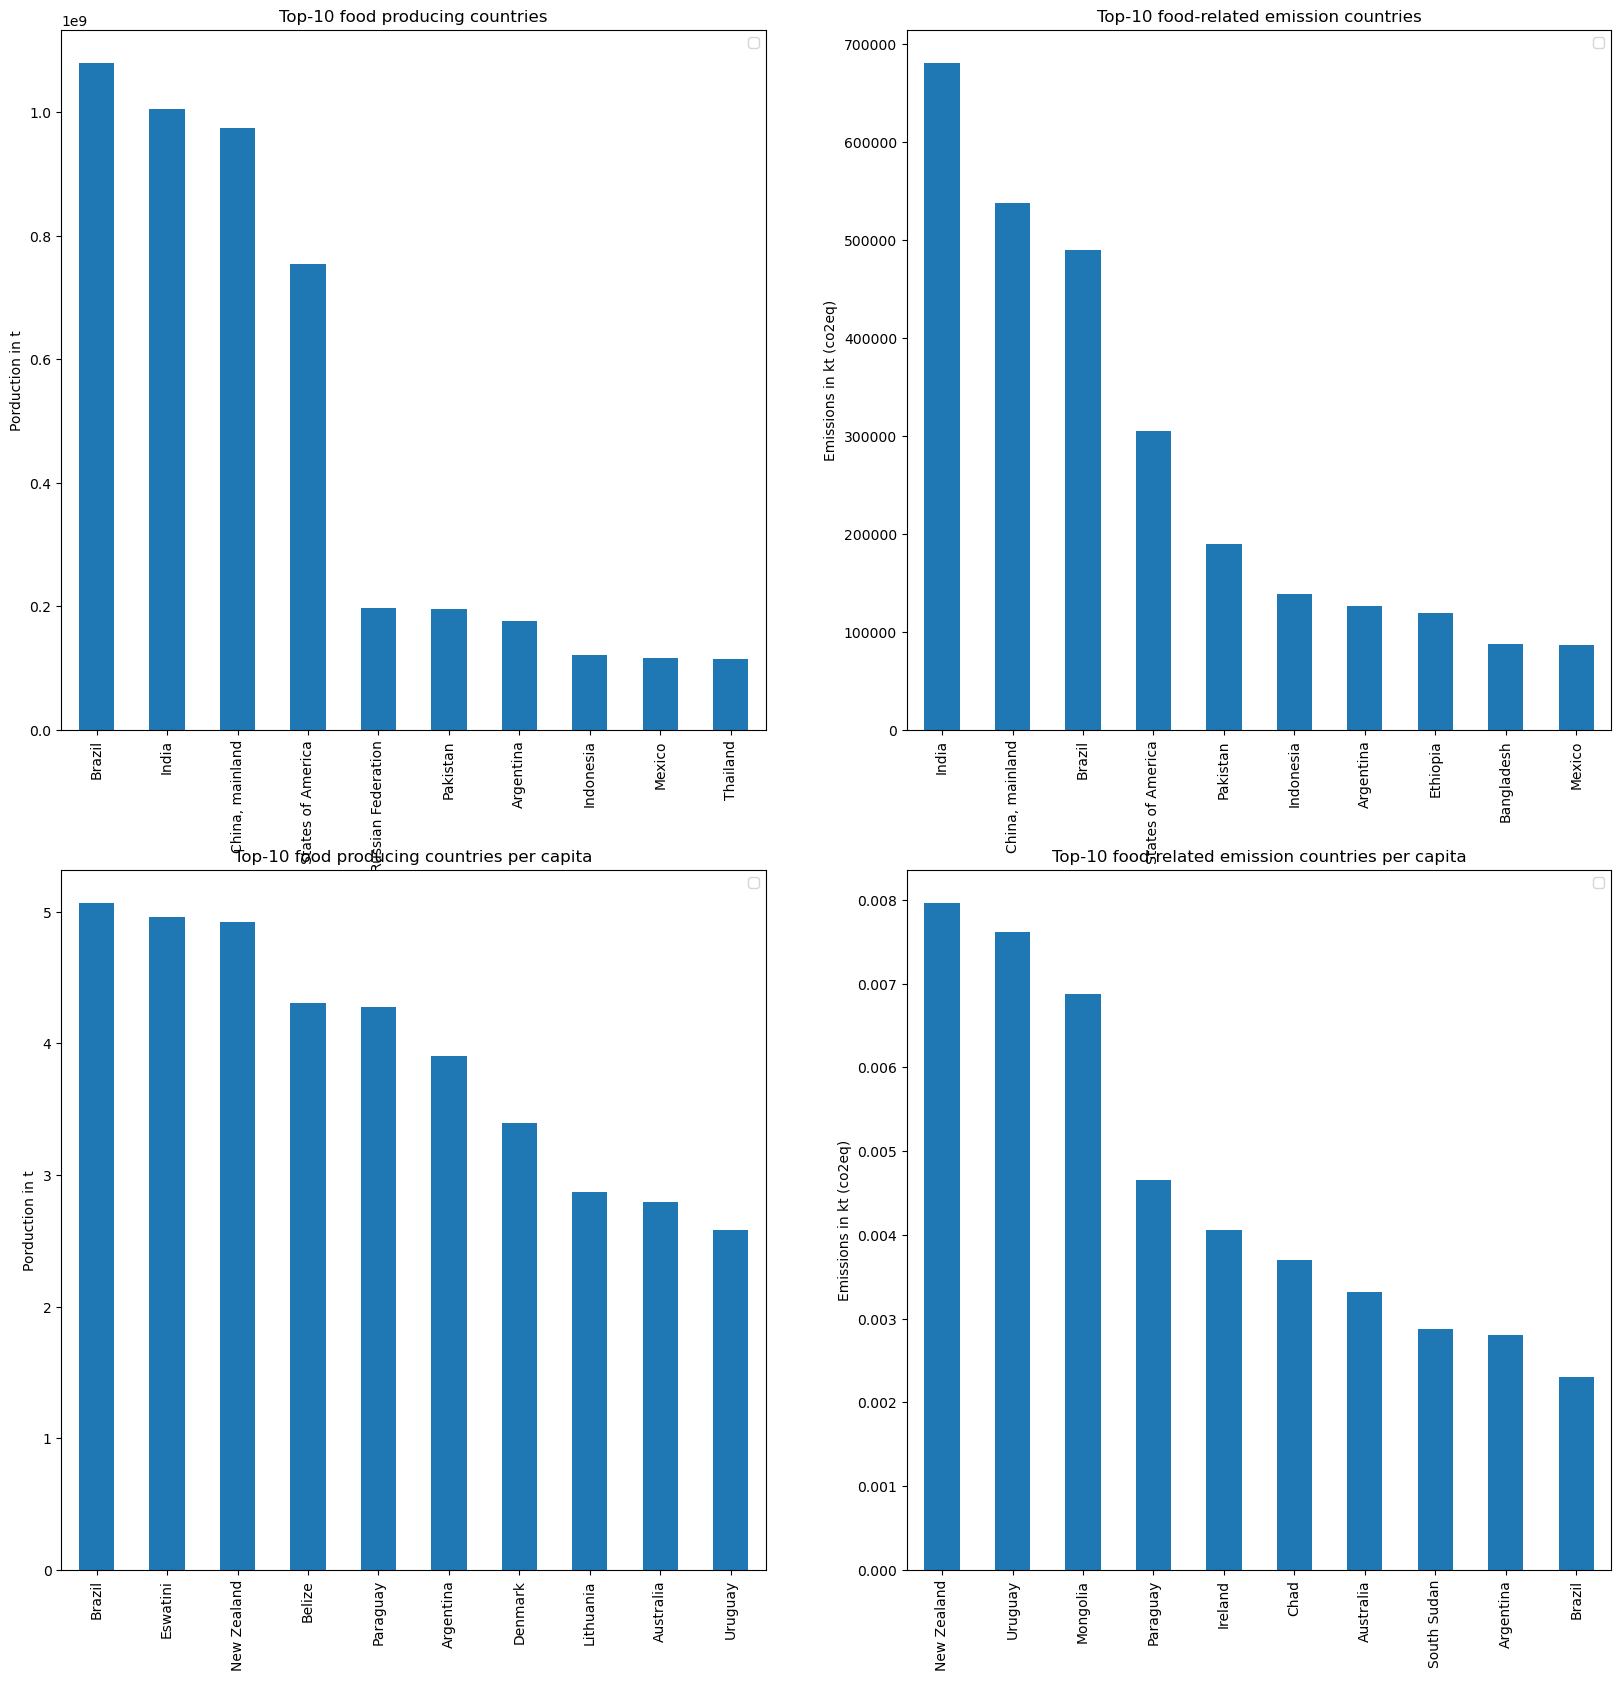

In [81]:
prod_emis_countries_grouped_1 = prod_emis_countries[['country', 'production_in_t']].groupby(['country'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)
prod_emis_countries_grouped_2 = prod_emis_countries[['country', 'prod_pop']].groupby(['country'], as_index=False).agg('sum').sort_values(by='prod_pop', ascending=False)
prod_emis_countries_grouped_3 = prod_emis_countries[['country', 'emissions_co2eq_combined_in_kt']].groupby(['country'], as_index=False).agg('sum').sort_values(by='emissions_co2eq_combined_in_kt', ascending=False)
prod_emis_countries_grouped_4 = prod_emis_countries[['country', 'emis_pop']].groupby(['country'], as_index=False).agg('sum').sort_values(by='emis_pop', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

prod_emis_countries_grouped_1.head(10).plot.bar(x='country', y='production_in_t', ax=axes[0][0])
axes[0][0].set_title('Top-10 food producing countries')
axes[0][0].set_xlabel('')
axes[0][0].legend('')
axes[0][0].set_ylabel('Porduction in t')

prod_emis_countries_grouped_3.head(10).plot.bar(x='country', y='emissions_co2eq_combined_in_kt', ax=axes[0][1])
axes[0][1].set_title('Top-10 food-related emission countries')
axes[0][1].set_xlabel('')
axes[0][1].legend('')
axes[0][1].set_ylabel('Emissions in kt (co2eq)')

prod_emis_countries_grouped_2.head(10).plot.bar(x='country', y='prod_pop', ax=axes[1][0])
axes[1][0].set_title('Top-10 food producing countries per capita')
axes[1][0].set_xlabel('')
axes[1][0].legend('')
axes[1][0].set_ylabel('Porduction in t')

prod_emis_countries_grouped_4.head(10).plot.bar(x='country', y='emis_pop', ax=axes[1][1])
axes[1][1].set_title('Top-10 food-related emission countries per capita')
axes[1][1].set_xlabel('')
axes[1][1].legend('')
axes[1][1].set_ylabel('Emissions in kt (co2eq)')

### Item comparison - production and emissions

In [40]:
prod_emis_items = df_prod_emis[(df_prod_emis.emissions_co2eq_combined_in_kt.notnull()) & (df_prod_emis.country == 'World')]

### Larger groups

In [41]:
items = prod_emis_countries.item.unique().tolist()
meat = list(filter(lambda x: 'Meat' in x, items))
milk_eggs= list(filter(lambda x: 'Raw milk' in x or 'Hen eggs' in x, items))
crops = list(set(items) - set(meat + milk_eggs))

In [42]:
def food_type(food_item):
    if food_item in meat:
        return 'meat'
    elif food_item in milk_eggs:
        return 'milk & eggs'
    return 'crops'

In [43]:
prod_emis_items['food_type'] = prod_emis_items.item.apply(lambda x: food_type(x))

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_19347/4085573758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_emis_items['food_type'] = prod_emis_items.item.apply(lambda x: food_type(x))


Text(0.5, 1.0, 'Total Food Emissions by Type')

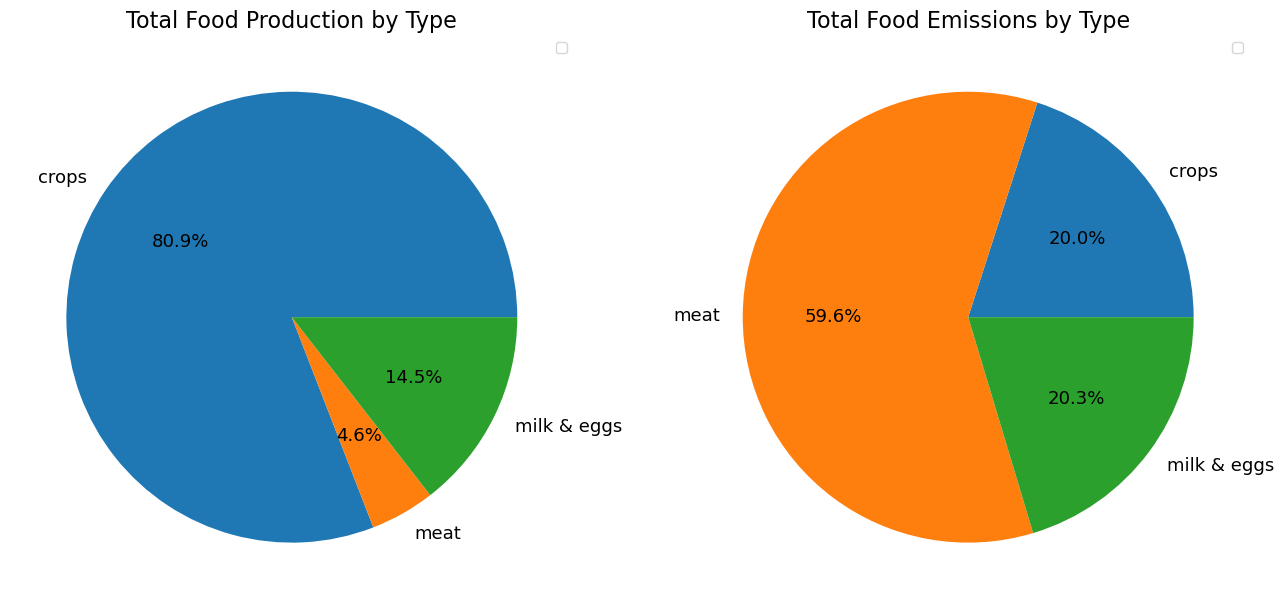

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

prod_emis_items_1 = prod_emis_items[prod_emis_items.year == 2020]

prod_emis_items_1[['food_type', 'production_in_t']].groupby('food_type').agg('sum').plot.pie(y='production_in_t', ax=axes[0], fontsize=13, autopct='%1.1f%%')
axes[0].set_ylabel('')
axes[0].legend('')
axes[0].set_title('Total Food Production by Type', fontsize=16)

prod_emis_items_1[['food_type', 'emissions_co2eq_combined_in_kt']].groupby('food_type').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=13, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Total Food Emissions by Type', fontsize=16)

Text(0.5, 1.0, 'Production by item group in 2020')

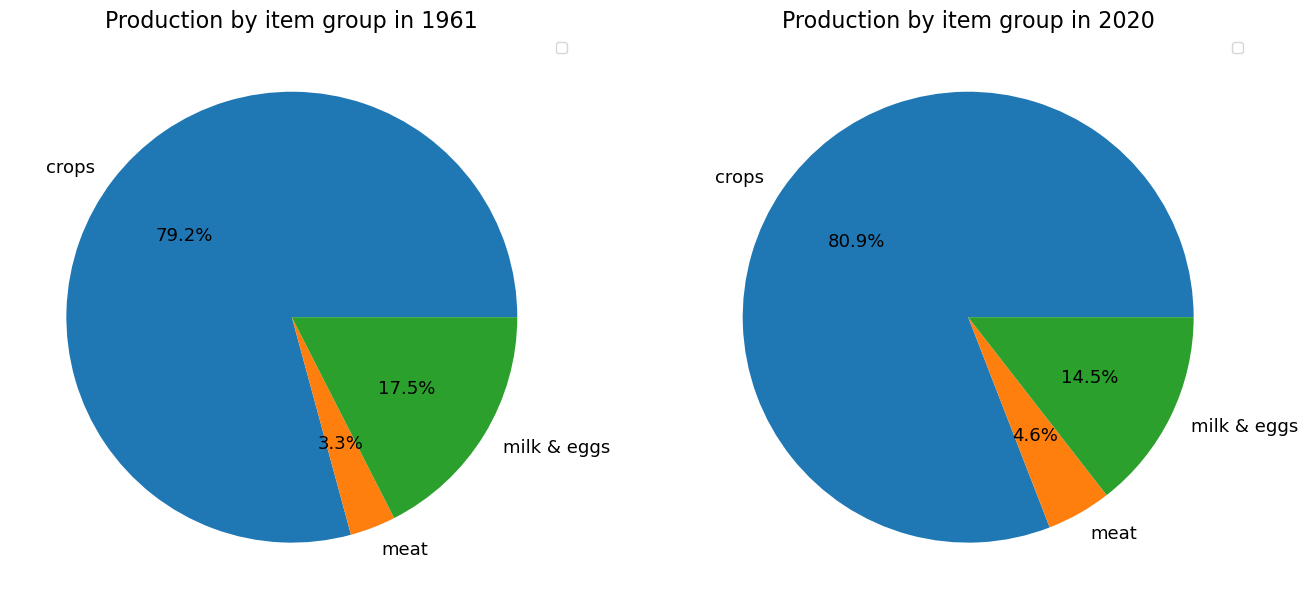

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

prod_emis_items_1961 = prod_emis_items[(prod_emis_items.year == 1961)]
prod_emis_items020 = prod_emis_items[(prod_emis_items.year == 2020)]

prod_emis_items_1961[['food_type', 'production_in_t']].groupby('food_type').agg('sum').plot.pie(y='production_in_t', ax=axes[0], fontsize=13, autopct='%1.1f%%')
axes[0].set_ylabel('')
axes[0].legend('')
axes[0].set_title('Production by item group in 1961', fontsize=16)

prod_emis_items020[['food_type', 'production_in_t']].groupby('food_type').agg('sum').plot.pie(y='production_in_t', ax=axes[1], fontsize=13, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Production by item group in 2020', fontsize=16)

### Smaller groups

Text(0.5, 1.0, 'Emissions by item group in 2020')

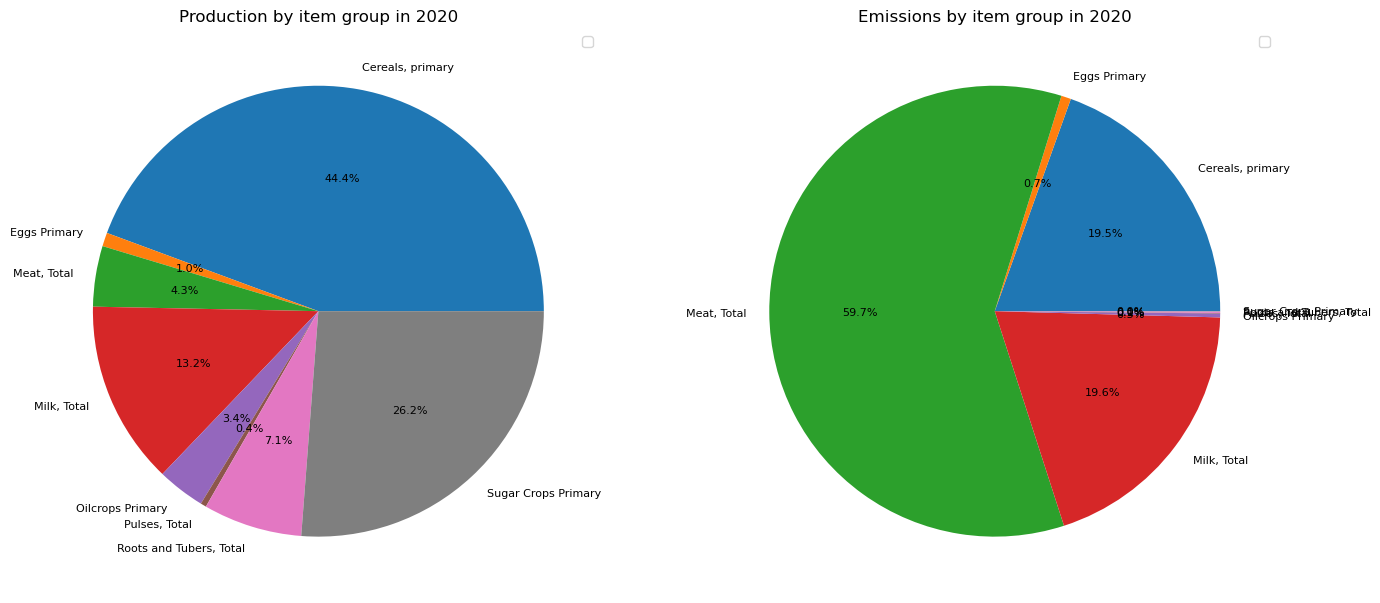

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

prod_emis_items[['item_group', 'production_in_t']].groupby('item_group').agg('sum').plot.pie(y='production_in_t', ax=axes[0], fontsize=8, autopct='%1.1f%%')
axes[0].set_ylabel('')
axes[0].legend('')
axes[0].set_title('Production by item group in 2020')

prod_emis_items[['item_group', 'emissions_co2eq_combined_in_kt']].groupby('item_group').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=8, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Emissions by item group in 2020')

### Item comparison - emission itensities

In [125]:
prod_emis_intensities = df_prod_emis[(df_prod_emis.year == 2020) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull())]

In [132]:
prod_emis_intensities_names = prod_emis_intensities
prod_emis_intensities_names['item'].replace('fresh', '', inplace=True)
prod_emis_intensities_names

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_22949/1727424028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_emis_intensities_names['item'].replace('fresh', '', inplace=True)


,country,continent,subcontinent,special_area,year,population,item,item_code,item_group,item_category,...,emissions_co2eq_calc_in_kt,emissions_intensity_calc_in_kg_co2eq_per_kg,source_emissions,emissions_co2eq_in_kt,emissions_intensity_in_kg_co2eq_per_kg,production_emissions_in_t,emissions_co2eq_combined_in_kt,emissions_intensity_combined_in_kg_co2eq_per_kg,prod_pop,emis_pop
3168,Mali,Africa,Western Africa,Land Locked Developing Countries,2020,21224040,"Beans, dry",176,"Pulses, Total","Crops, primary",...,5.5130,0.0300,FAO TIER 1,NaN,NaN,NaN,5.5130,0.0300,0.007710,2.597526e-07
3210,Mali,Africa,Western Africa,Land Locked Developing Countries,2020,21224040,"Hen eggs in shell, fresh",1062,Eggs Primary,Livestock primary,...,NaN,NaN,None,58.7553,3.1392,18716.90,58.7553,3.1392,0.000882,2.768337e-06
3217,Mali,Africa,Western Africa,Land Locked Developing Countries,2020,21224040,Maize (corn),56,"Cereals, primary","Crops, primary",...,291.5502,0.0765,FAO TIER 1,NaN,NaN,NaN,291.5502,0.0765,0.165702,1.373679e-05
3221,Mali,Africa,Western Africa,Land Locked Developing Countries,2020,21224040,"Meat of cattle with the bone, fresh or chilled",867,"Meat, Total",Livestock primary,...,NaN,NaN,None,13530.4723,189.8957,71252.13,13530.4723,189.8957,0.003357,6.375069e-04
3222,Mali,Africa,Western Africa,Land Locked Developing Countries,2020,21224040,"Meat of chickens, fresh or chilled",1058,"Meat, Total",Livestock primary,...,NaN,NaN,None,170.5565,2.9586,57647.28,170.5565,2.9586,0.002716,8.036005e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992321,Malaysia,Asia,South-eastern Asia,-,2020,33199993,Soya beans,236,Oilcrops Primary,"Crops, primary",...,0.0000,NaN,FAO TIER 1,NaN,NaN,NaN,0.0000,NaN,0.000000,0.000000e+00
992323,Malaysia,Asia,South-eastern Asia,-,2020,33199993,Sugar cane,156,Sugar Crops Primary,"Crops, primary",...,0.0942,0.0039,FAO TIER 1,NaN,NaN,NaN,0.0942,0.0039,0.000708,2.837350e-09
993663,Maldives,Asia,Southern Asia,Net Food Importing Developing Countries,2020,514438,Maize (corn),56,"Cereals, primary","Crops, primary",...,0.0028,0.0195,FAO TIER 1,NaN,NaN,NaN,0.0028,0.0195,0.000279,5.442833e-09
993665,Maldives,Asia,Southern Asia,Net Food Importing Developing Countries,2020,514438,Millet,79,"Cereals, primary","Crops, primary",...,0.0000,0.0000,FAO TIER 1,NaN,NaN,NaN,0.0000,0.0000,0.000010,0.000000e+00


### Emission itensities overall

Text(0.5, 0, 'Emission intensity')

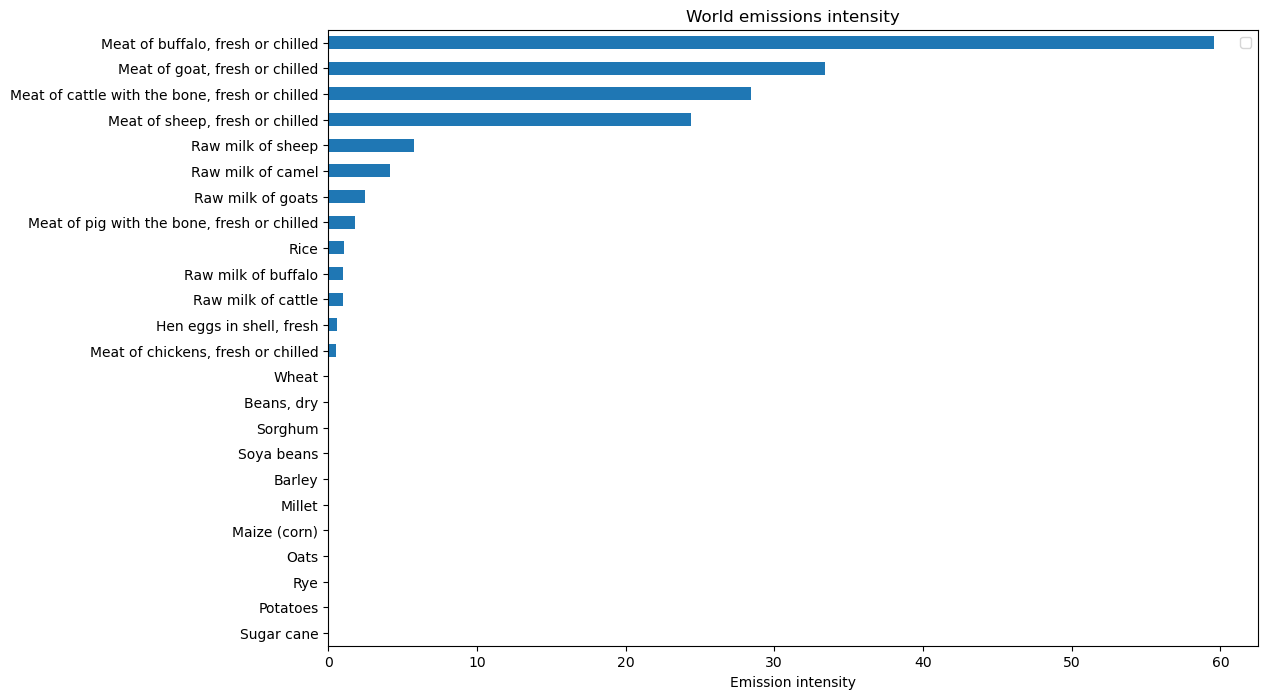

In [133]:
prod_emis_intensities_names_grouped_1 = prod_emis_intensities_names[prod_emis_intensities_names['special_area'] == 'World']
prod_emis_intensities_names_grouped_1 = prod_emis_intensities_names_grouped_1[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)
prod_emis_intensities_names_grouped_2 = prod_emis_intensities_names[prod_emis_intensities_names['country'] == 'Germany']
prod_emis_intensities_names_grouped_2= prod_emis_intensities_names_grouped_2[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)
prod_emis_intensities_names_grouped_3 = prod_emis_intensities_names[prod_emis_intensities_names['special_area'] == 'European Union (27)']
prod_emis_intensities_names_grouped_3= prod_emis_intensities_names_grouped_3[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(12, 8))

prod_emis_intensities_names_grouped_1.plot.barh(x='item', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes)
axes.set_title('World emissions intensity')
axes.set_ylabel('')
axes.legend('')
axes.set_xlabel('Emission intensity')

#prod_emis_intensities_names_grouped_2.plot.barh(x='item', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1])
#axes[1].set_title('Emission intensity in Germany')
#axes[1].set_ylabel('')
#axes[1].legend('')
#axes[1].set_xlabel('Emission intensity')

### Emission itensities by countries/continents

Text(0, 0.5, 'emission intensity')

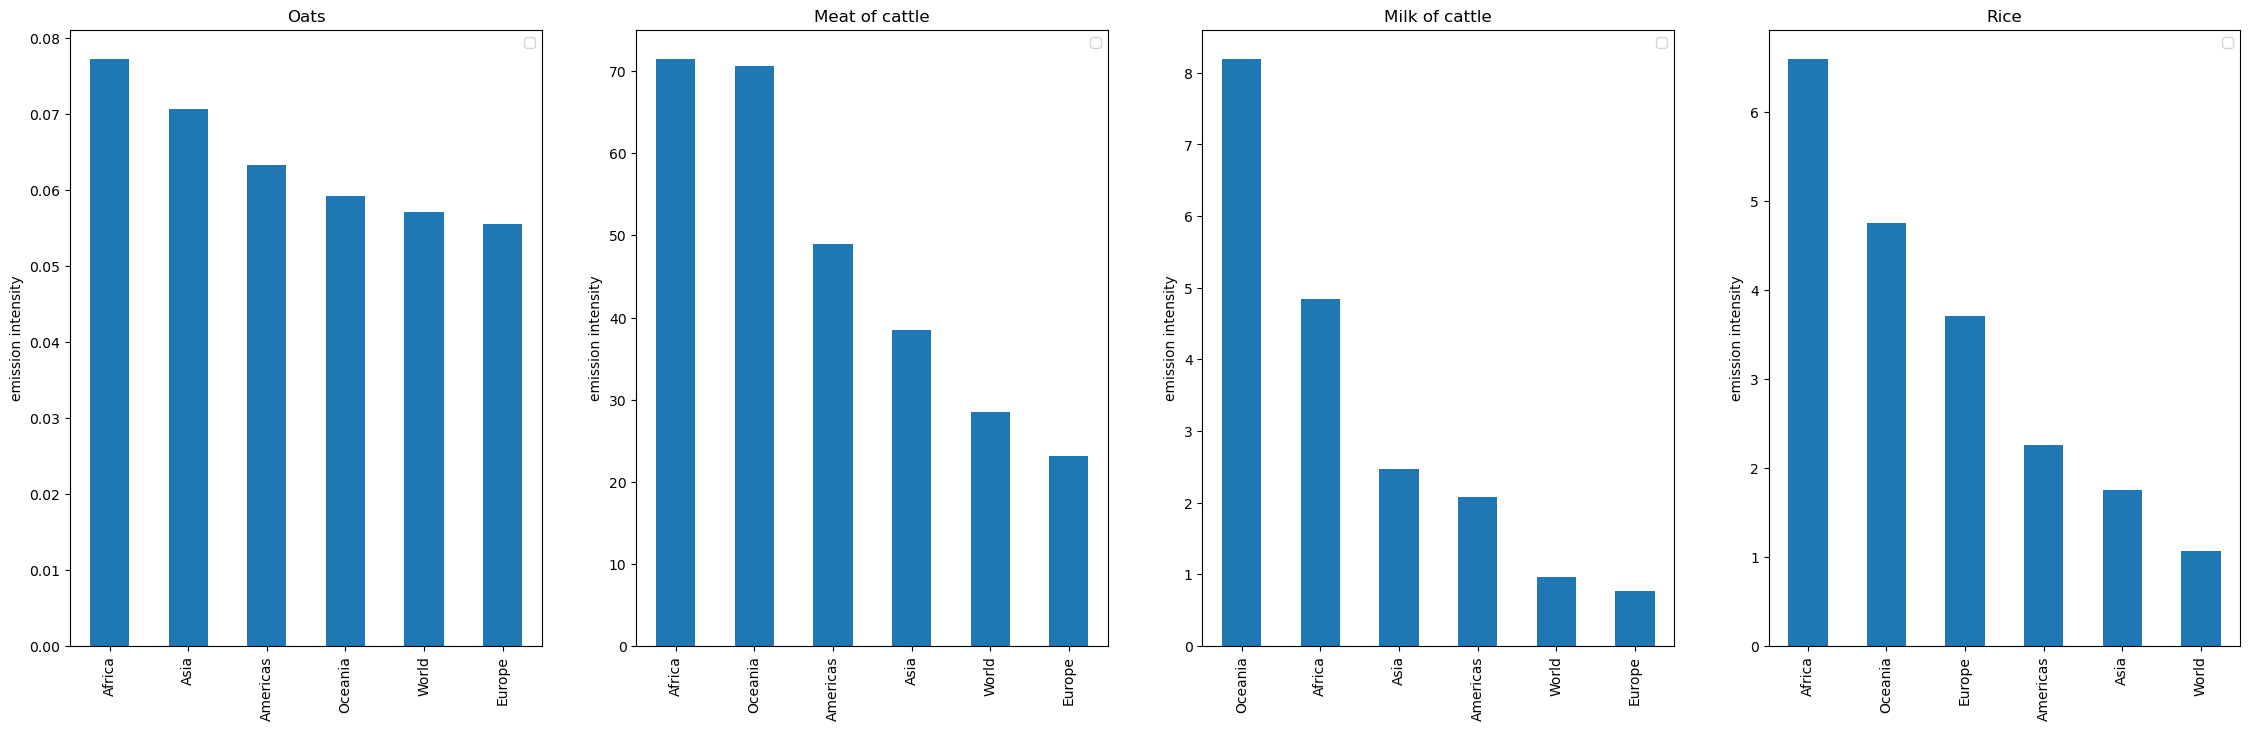

In [51]:
prod_emis_intensities_grouped_1 = prod_emis_intensities[prod_emis_intensities['item'] == 'Oats']
prod_emis_intensities_grouped_1 = prod_emis_intensities_grouped_1[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_2 = prod_emis_intensities[prod_emis_intensities['item'] == 'Meat of cattle with the bone, fresh or chilled']
prod_emis_intensities_grouped_2 = prod_emis_intensities_grouped_2[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_3 = prod_emis_intensities[prod_emis_intensities['item'] == 'Raw milk of cattle']
prod_emis_intensities_grouped_3 = prod_emis_intensities_grouped_3[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_4 = prod_emis_intensities[prod_emis_intensities['item'] == 'Rice']
prod_emis_intensities_grouped_4 = prod_emis_intensities_grouped_4[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

fig, axes = plt.subplots(1, 4, figsize=(28, 8))

prod_emis_intensities_grouped_1.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0])
axes[0].set_title('Oats')
axes[0].set_xlabel('')
axes[0].legend('')
axes[0].set_ylabel('emission intensity')

prod_emis_intensities_grouped_2.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1])
axes[1].set_title('Meat of cattle')
axes[1].set_xlabel('')
axes[1].legend('')
axes[1].set_ylabel('emission intensity')

prod_emis_intensities_grouped_3.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[2])
axes[2].set_title('Milk of cattle')
axes[2].set_xlabel('')
axes[2].legend('')
axes[2].set_ylabel('emission intensity')

prod_emis_intensities_grouped_4.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[3])
axes[3].set_title('Rice')
axes[3].set_xlabel('')
axes[3].legend('')
axes[3].set_ylabel('emission intensity')